In [1]:
# import libraries
import os
import time
import h5py
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True})
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import viewer
import pandas as pd
import blimpy

import matplotlib
# matplotlib.use('TkAgg')
%matplotlib inline

mplc = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

kj/filesystem-disk-unix.c++:1734: warning: PWD environment variable doesn't match current directory; pwd = /home/njbal


In [2]:
def open_data(fname):
    h = h5py.File(fname, 'r') # open data
#     print(fname)
    file_info = blimpy.h5diag.read_header(h)


    ds = h['data']
    arr = ds[()] # dataset
    power_arr = np.squeeze(arr, axis=1)
#     print('Data shape:', power_arr.shape)
    h.close()
    
    return power_arr, file_info


def calc_freq_t_arrays(file_info, power_arr_shape):
    # # Extracting file information
    tsamp = file_info['tsamp']
    tstart = file_info['tstart']
    fch1 = file_info['fch1'] # first channel freq
    foff = file_info['foff'] # frequency offset
    
    # Printing file info
    print('File info:')
    for info in file_info: 
        print(f'{info}: {file_info[info]}')    
    freq_arr = np.arange(0, power_arr_shape[1], 1)*foff + fch1
    t_arr = np.arange(0, power_arr_shape[0], 1)*tsamp + tstart    
    return freq_arr, t_arr


In [3]:
# files_list = np.array(os.listdir())
# h5_data_list = []
# for x in files_list:
#     if '.h5' in x:
#         h5_data_list.append(x)
#     else:
#         continue

In [4]:
# for h in h5_data_list:
#     power_arr, file_info = open_data(h)
#     print(file_info)

beam 0
hit with source JWST, beam 0, 2269.45030 MHz, 39.9 SNR, -0.179 Hz/s drift:


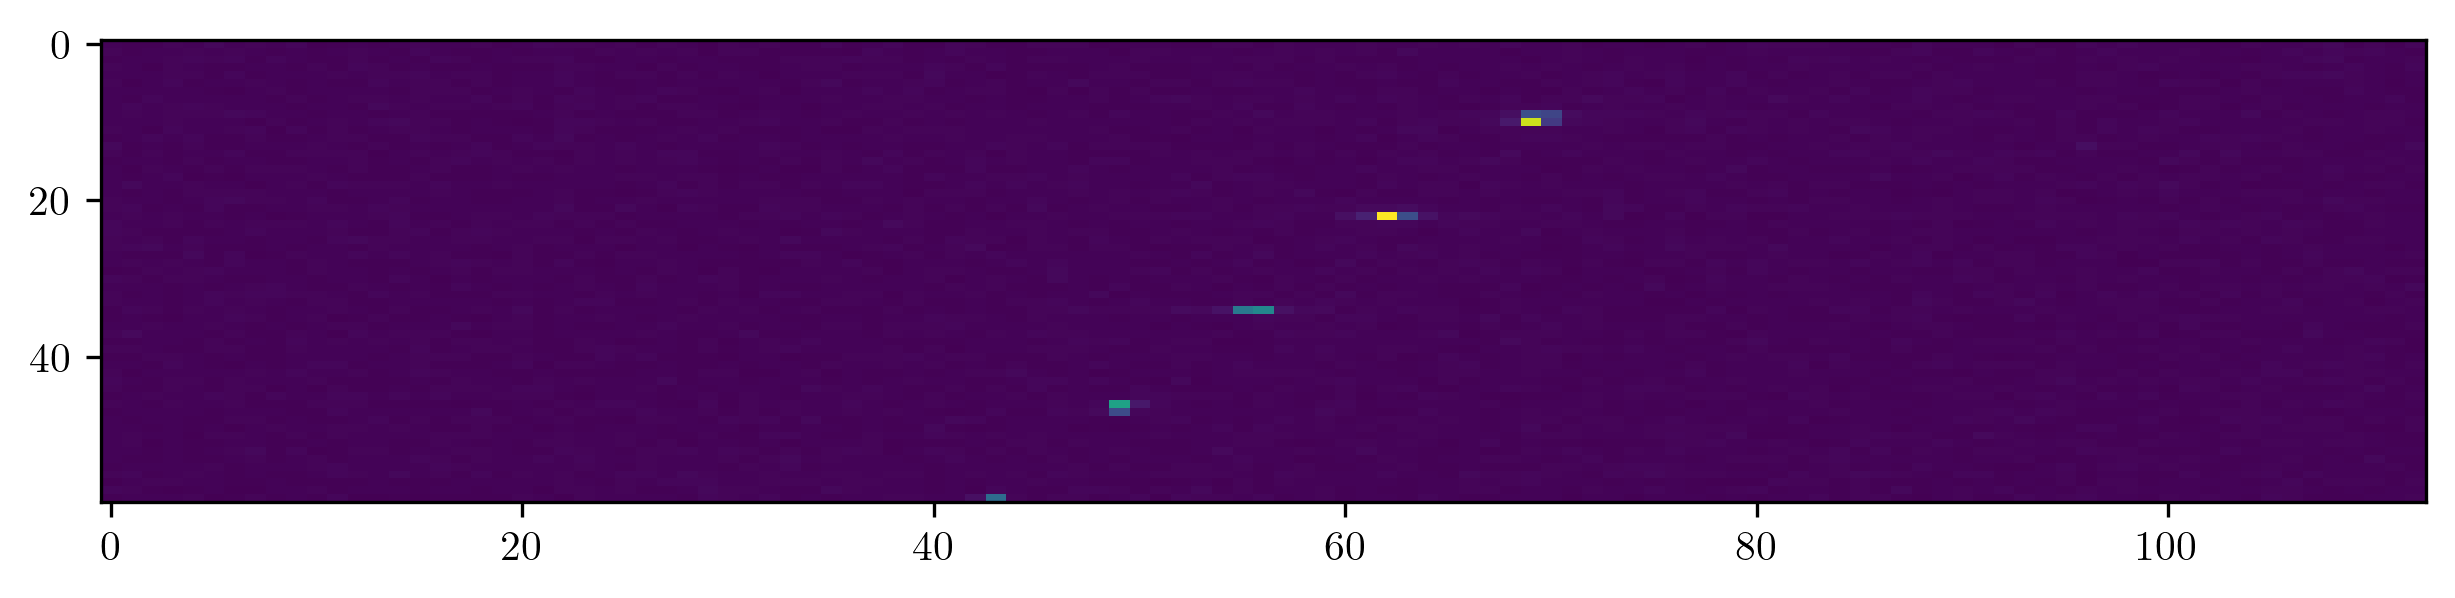

beam 0
hit with source JWST, beam 0, 2269.48734 MHz, 6.3 SNR, -0.190 Hz/s drift:


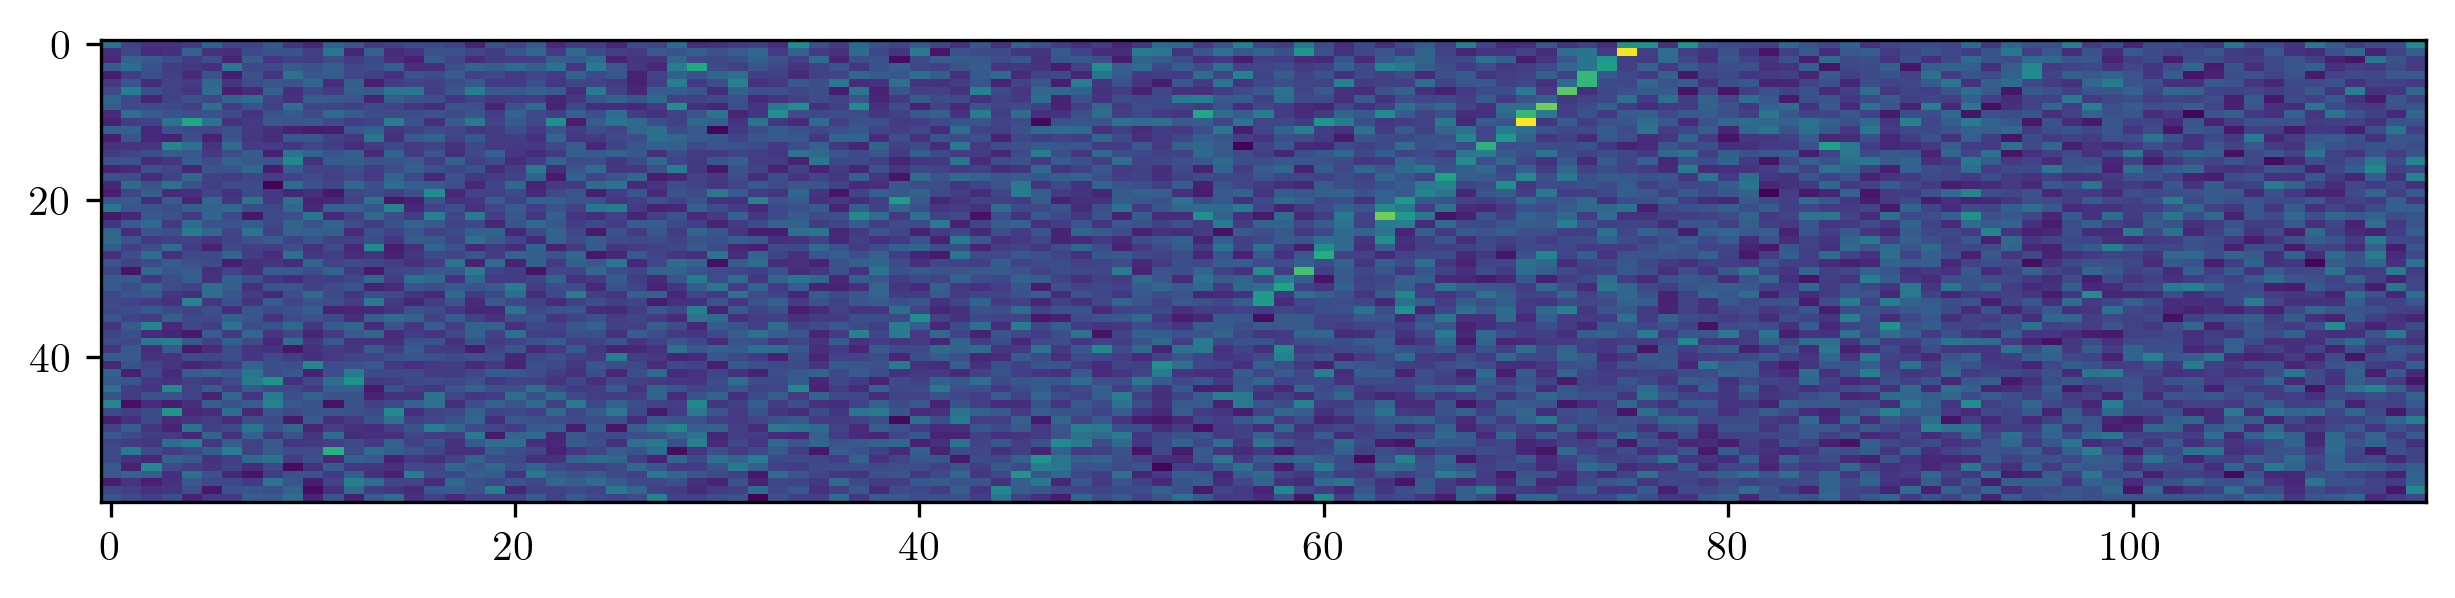

beam 0
hit with source JWST, beam 0, 2269.51411 MHz, 49.7 SNR, -0.184 Hz/s drift:


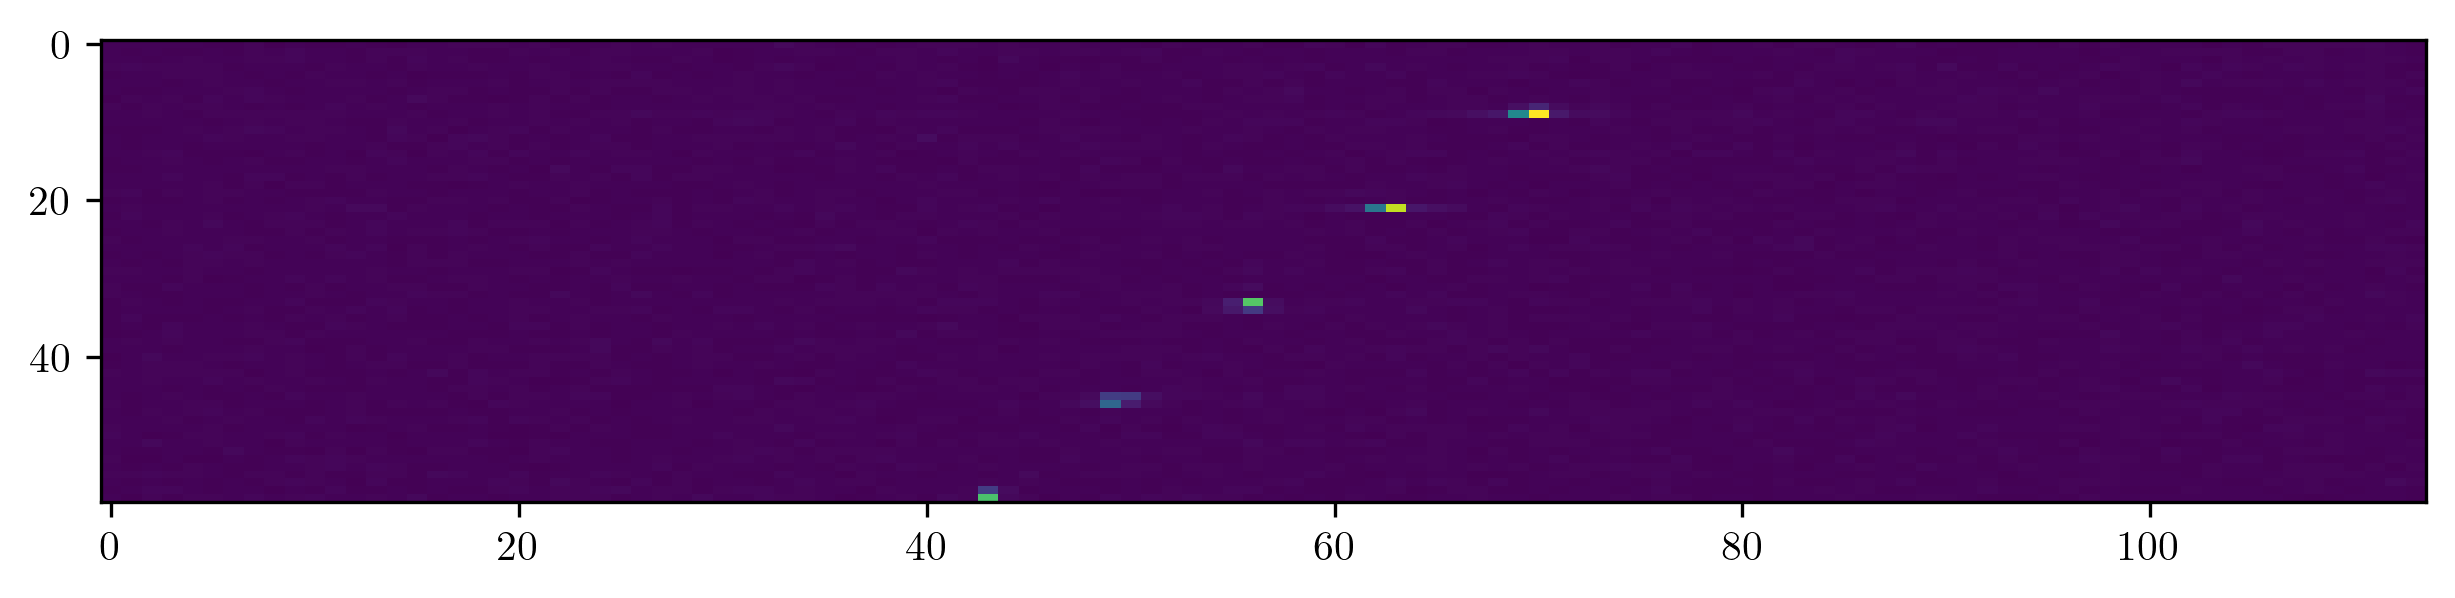

beam 0
hit with source JWST, beam 0, 2269.52736 MHz, 11.2 SNR, -0.184 Hz/s drift:


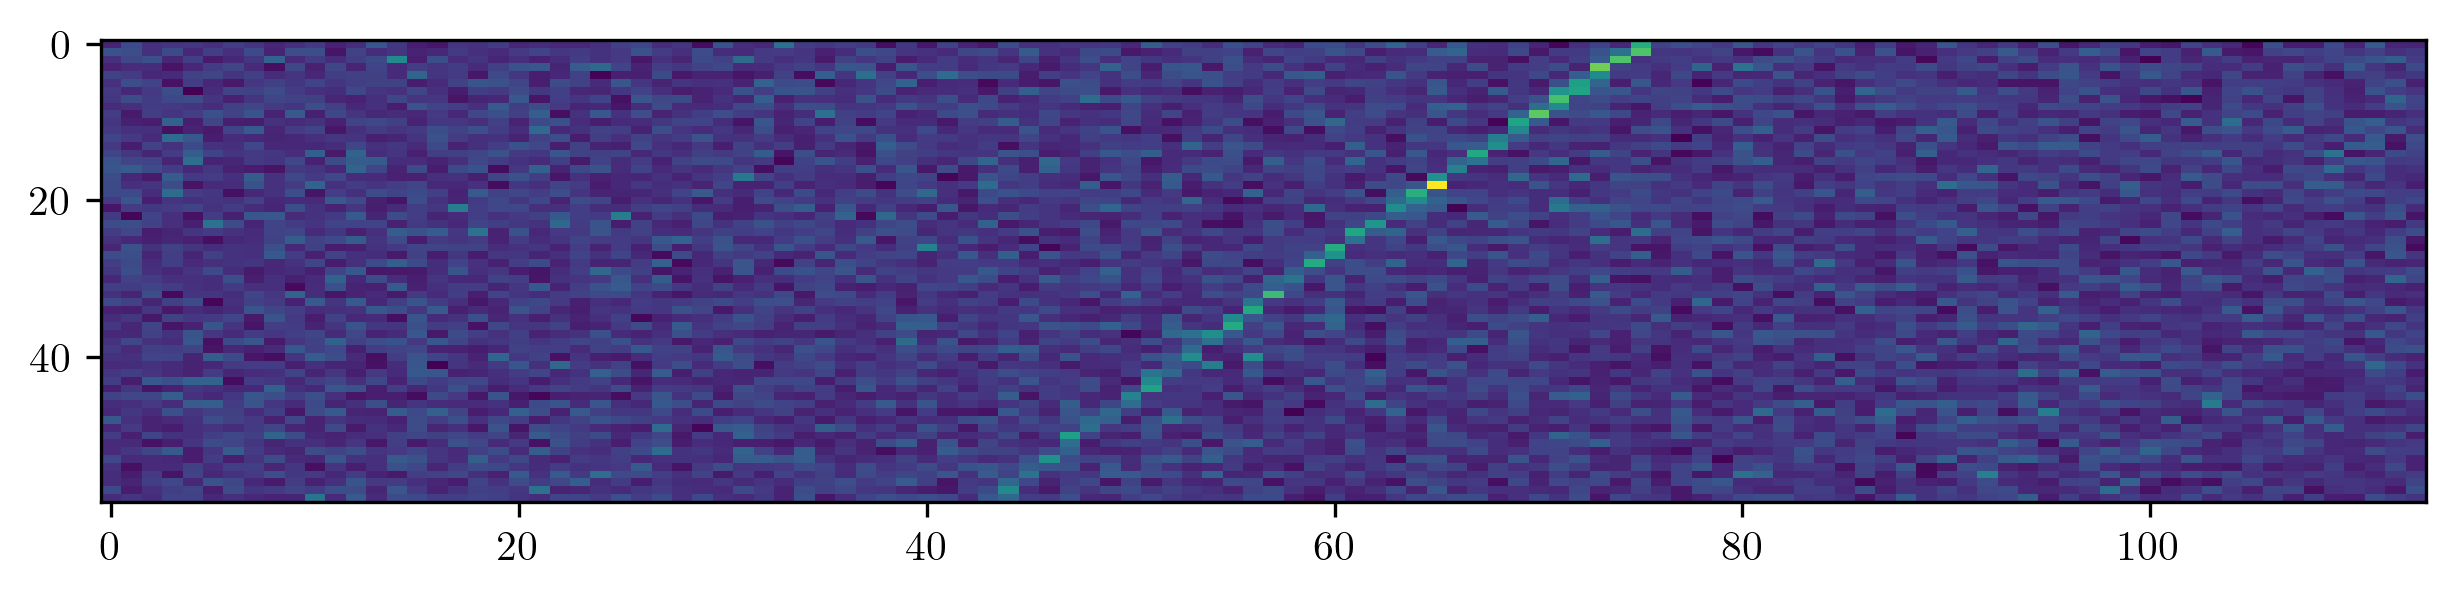

beam 0
hit with source JWST, beam 0, 2269.53534 MHz, 6.7 SNR, -0.190 Hz/s drift:


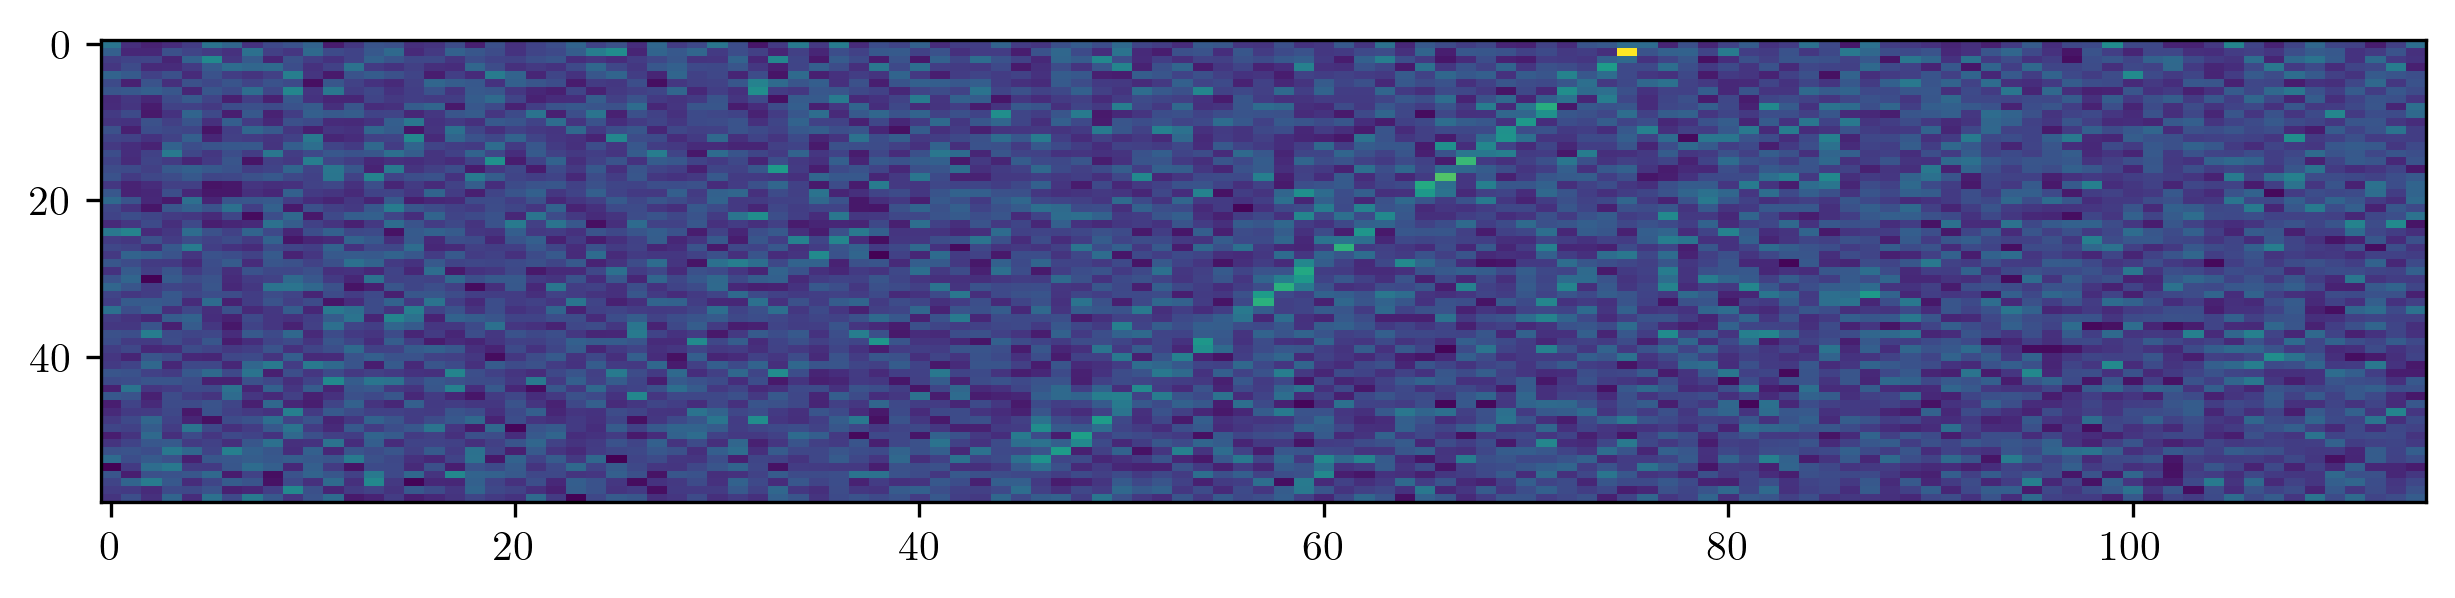

beam 0
hit with source JWST, beam 0, 2269.55134 MHz, 7.1 SNR, -0.190 Hz/s drift:


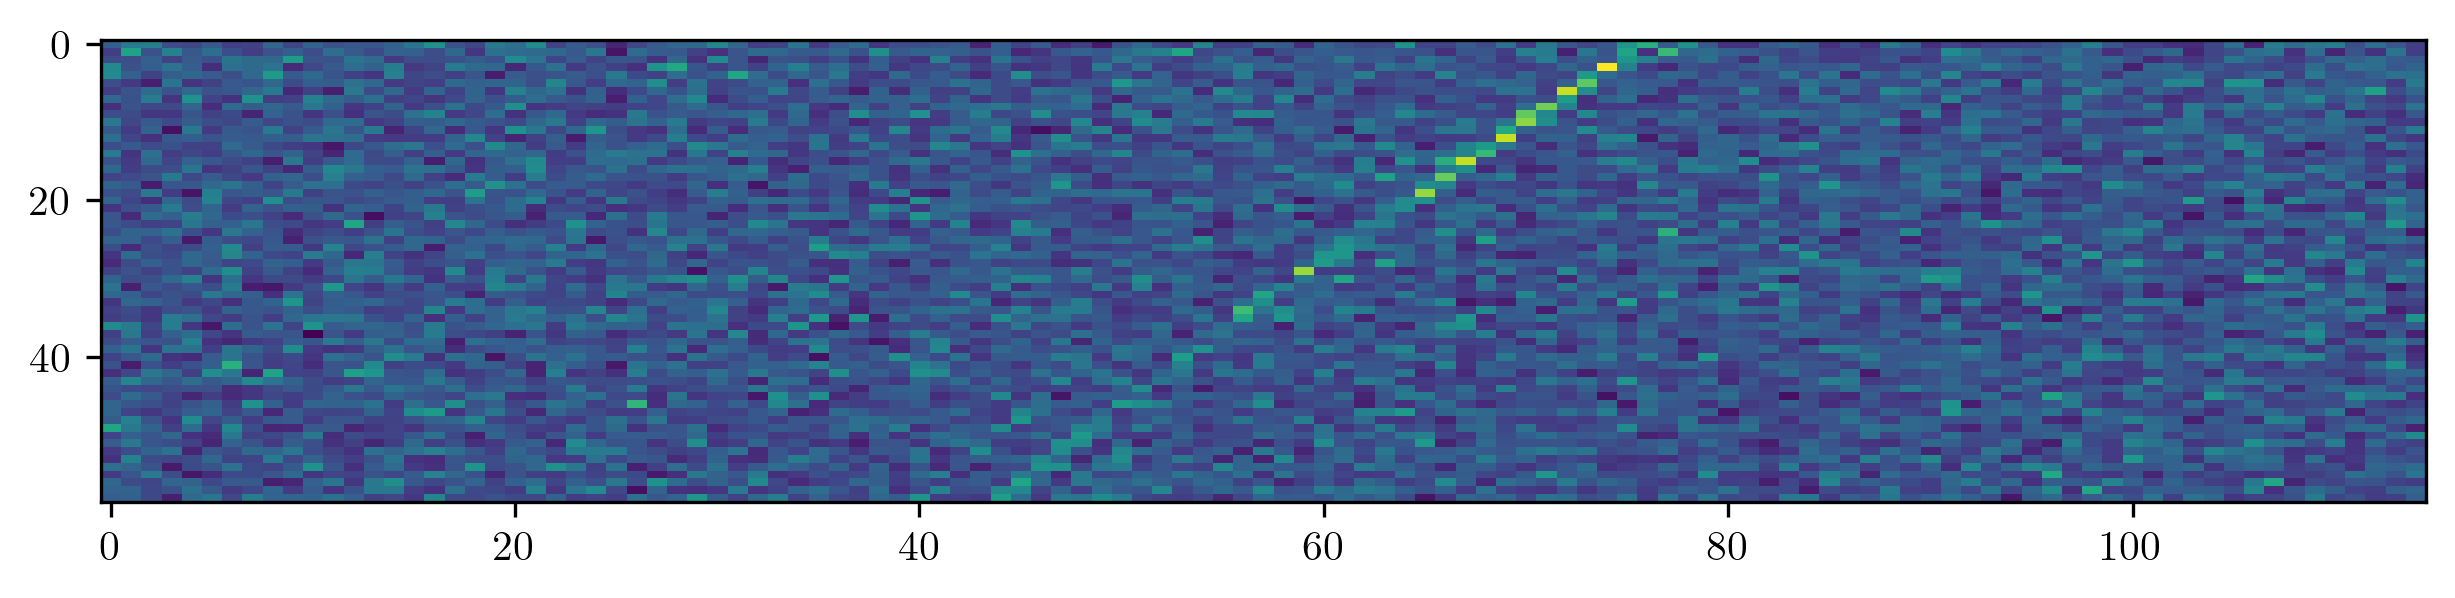

beam 0
hit with source JWST, beam 0, 2269.56734 MHz, 6.1 SNR, -0.190 Hz/s drift:


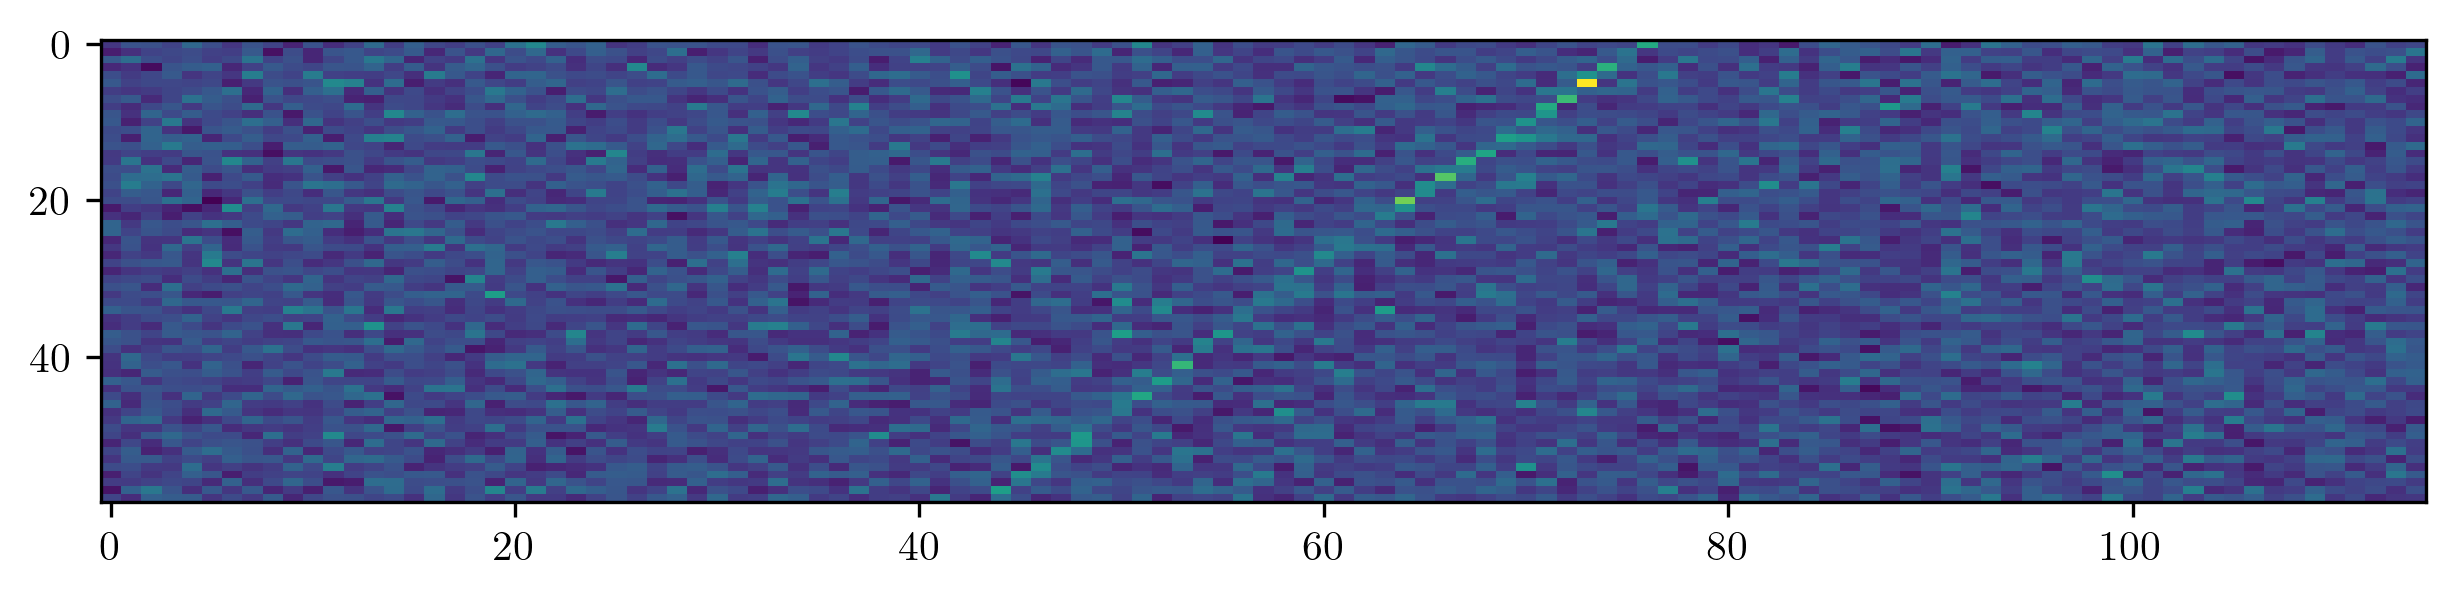

beam 0
hit with source JWST, beam 0, 2269.57791 MHz, 7.3 SNR, -0.184 Hz/s drift:


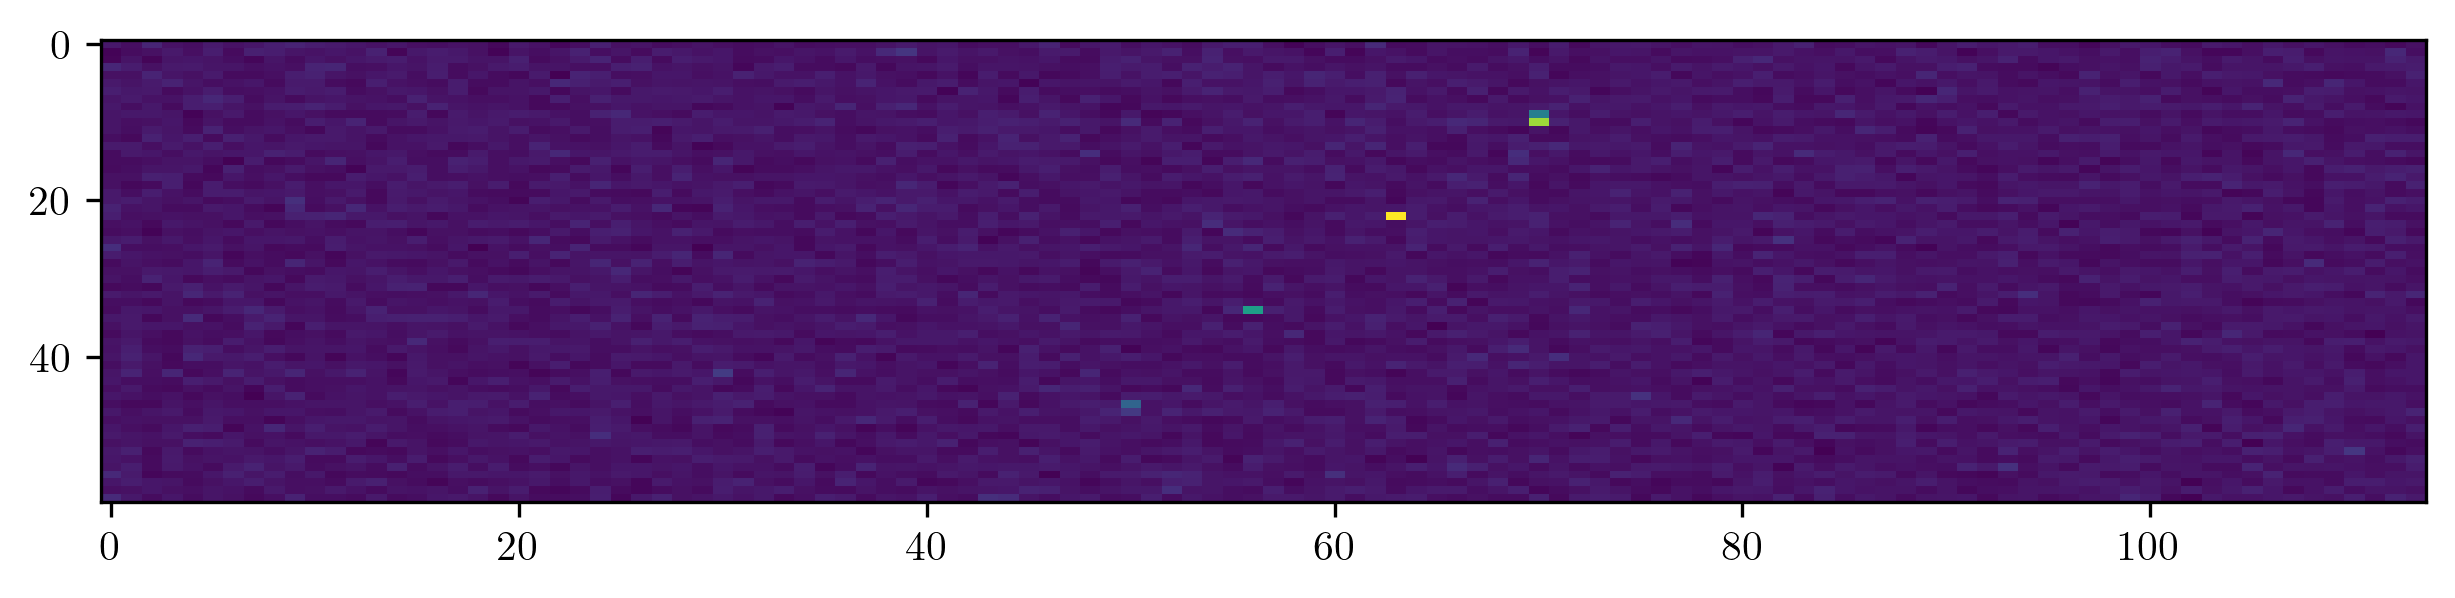

beam 0
hit with source JWST, beam 0, 2269.59934 MHz, 6.9 SNR, -0.190 Hz/s drift:


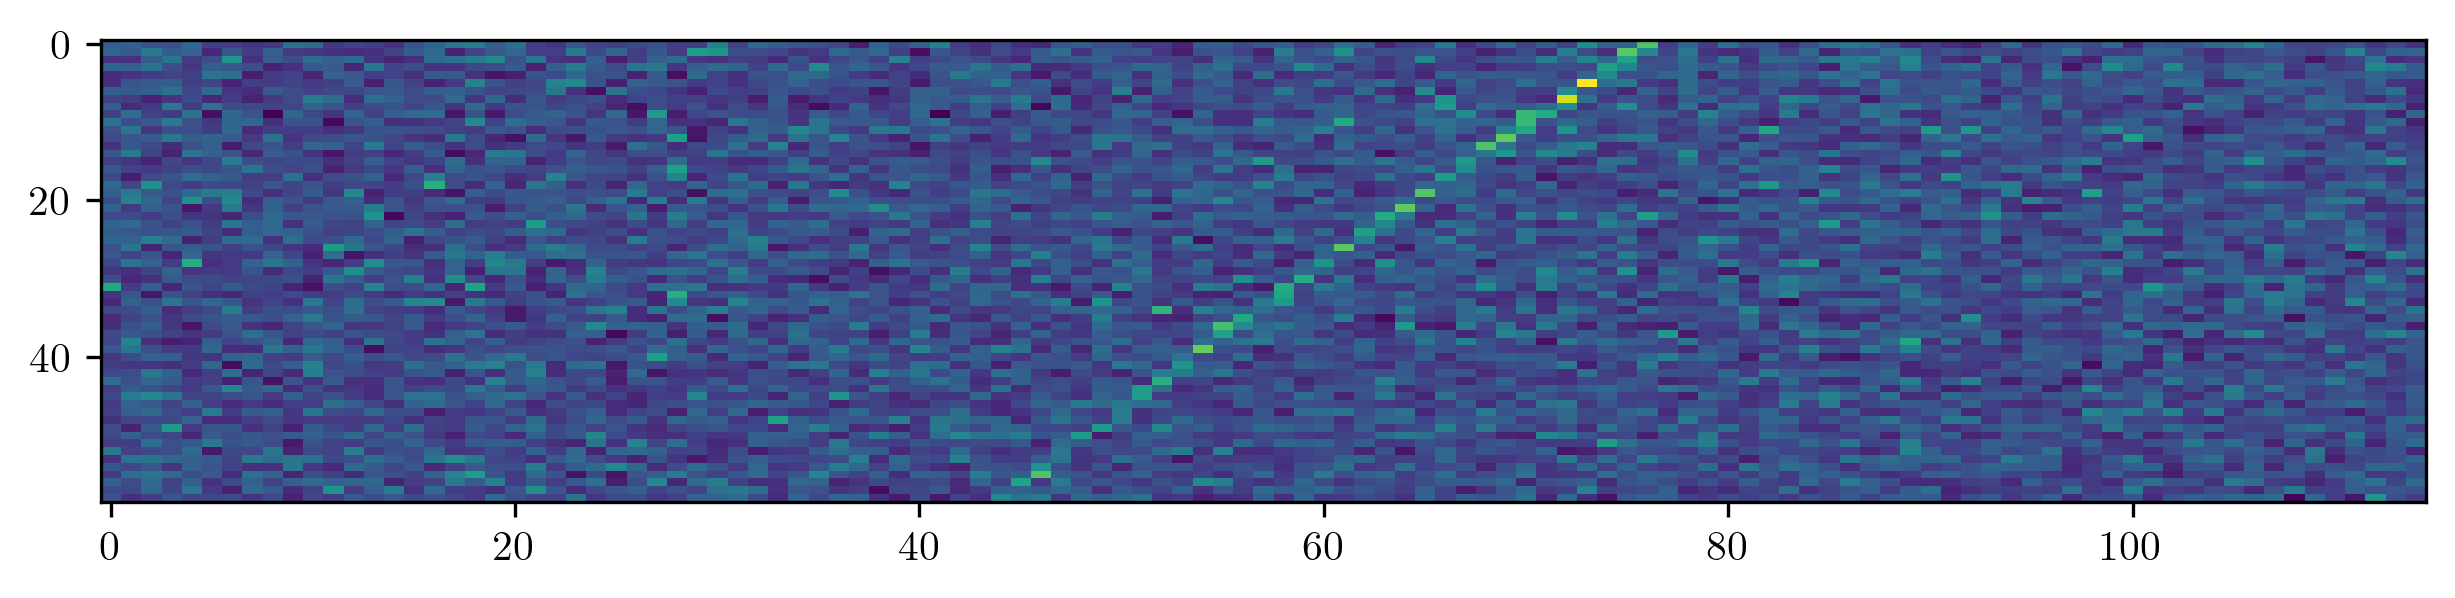

beam 0
hit with source JWST, beam 0, 2269.60736 MHz, 10.8 SNR, -0.184 Hz/s drift:


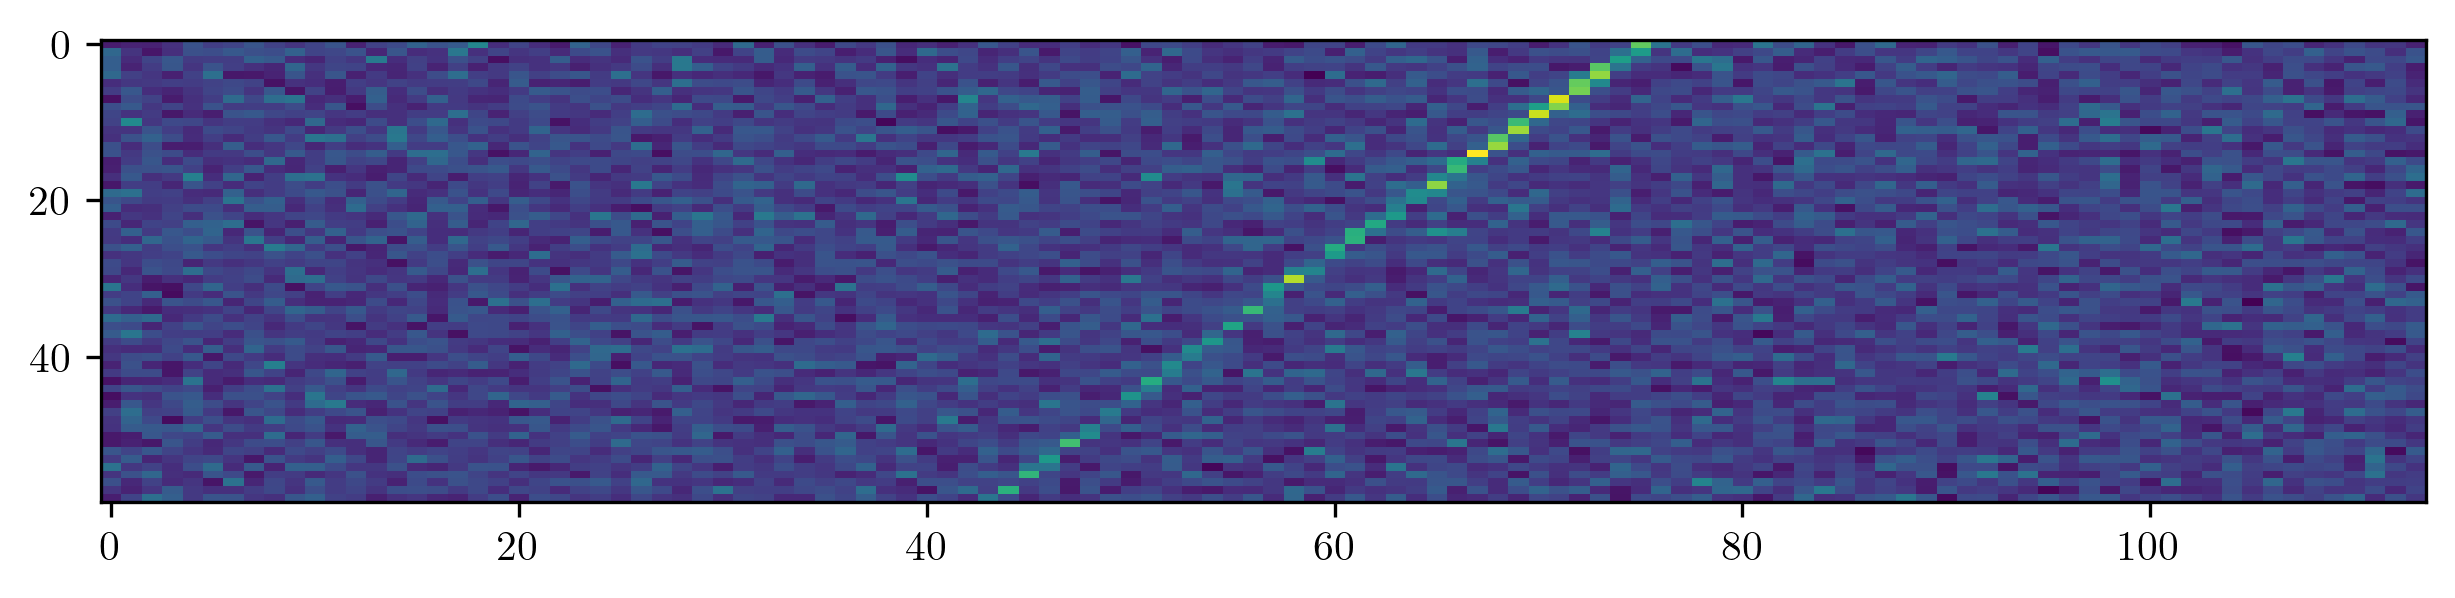

beam 0
hit with source JWST, beam 0, 2269.61534 MHz, 7.7 SNR, -0.190 Hz/s drift:


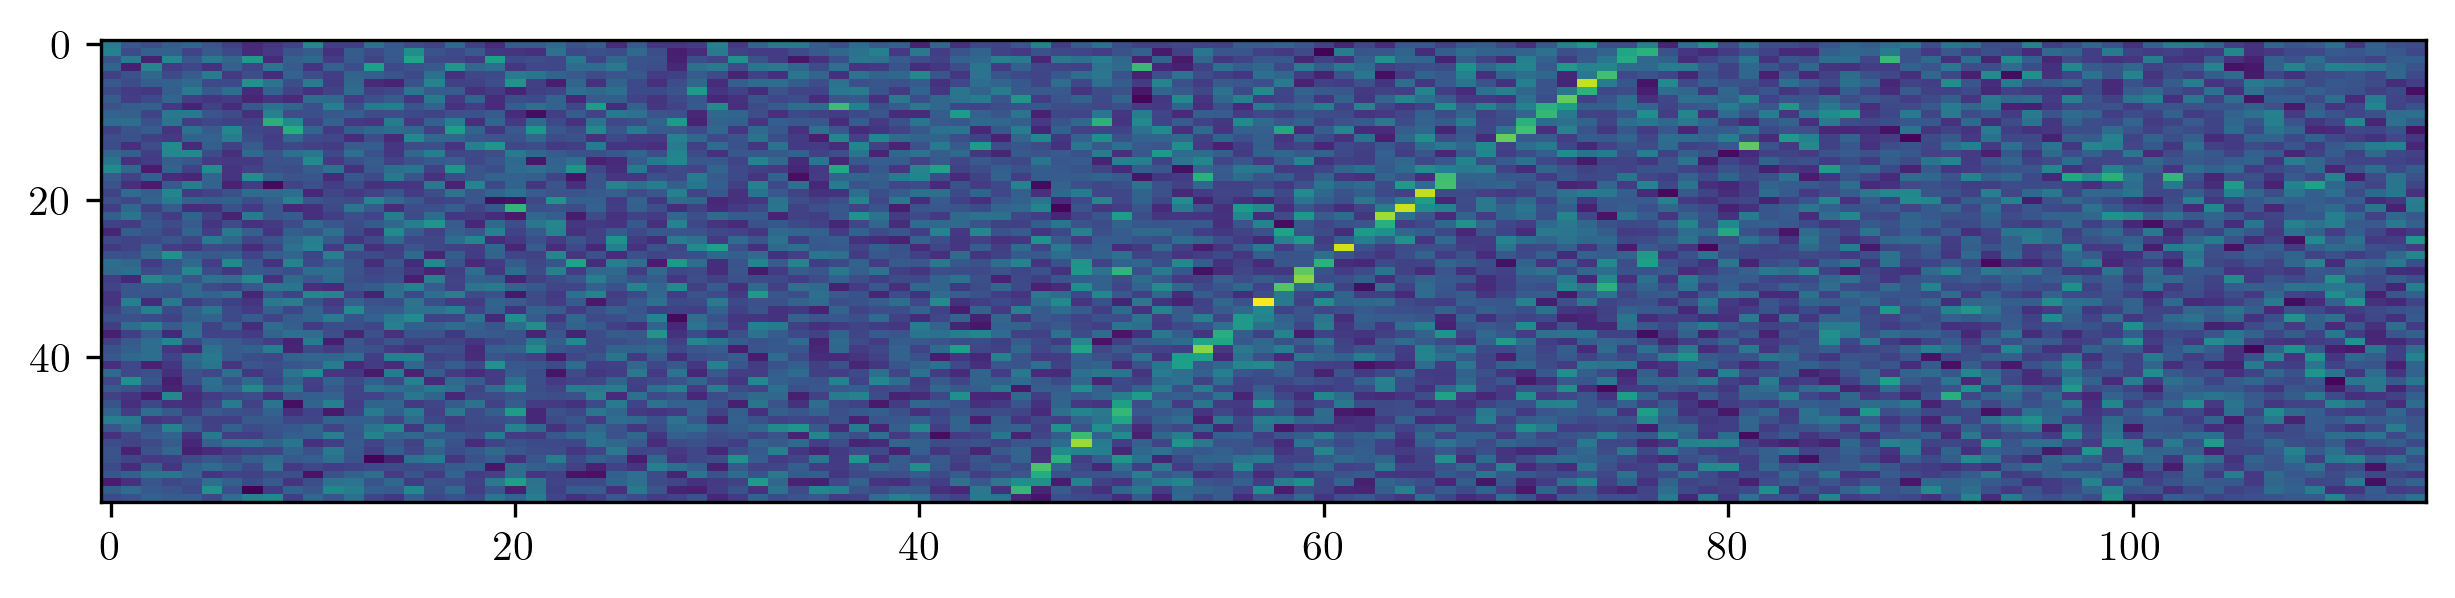

beam 0
hit with source JWST, beam 0, 2269.64171 MHz, 21.3 SNR, -0.179 Hz/s drift:


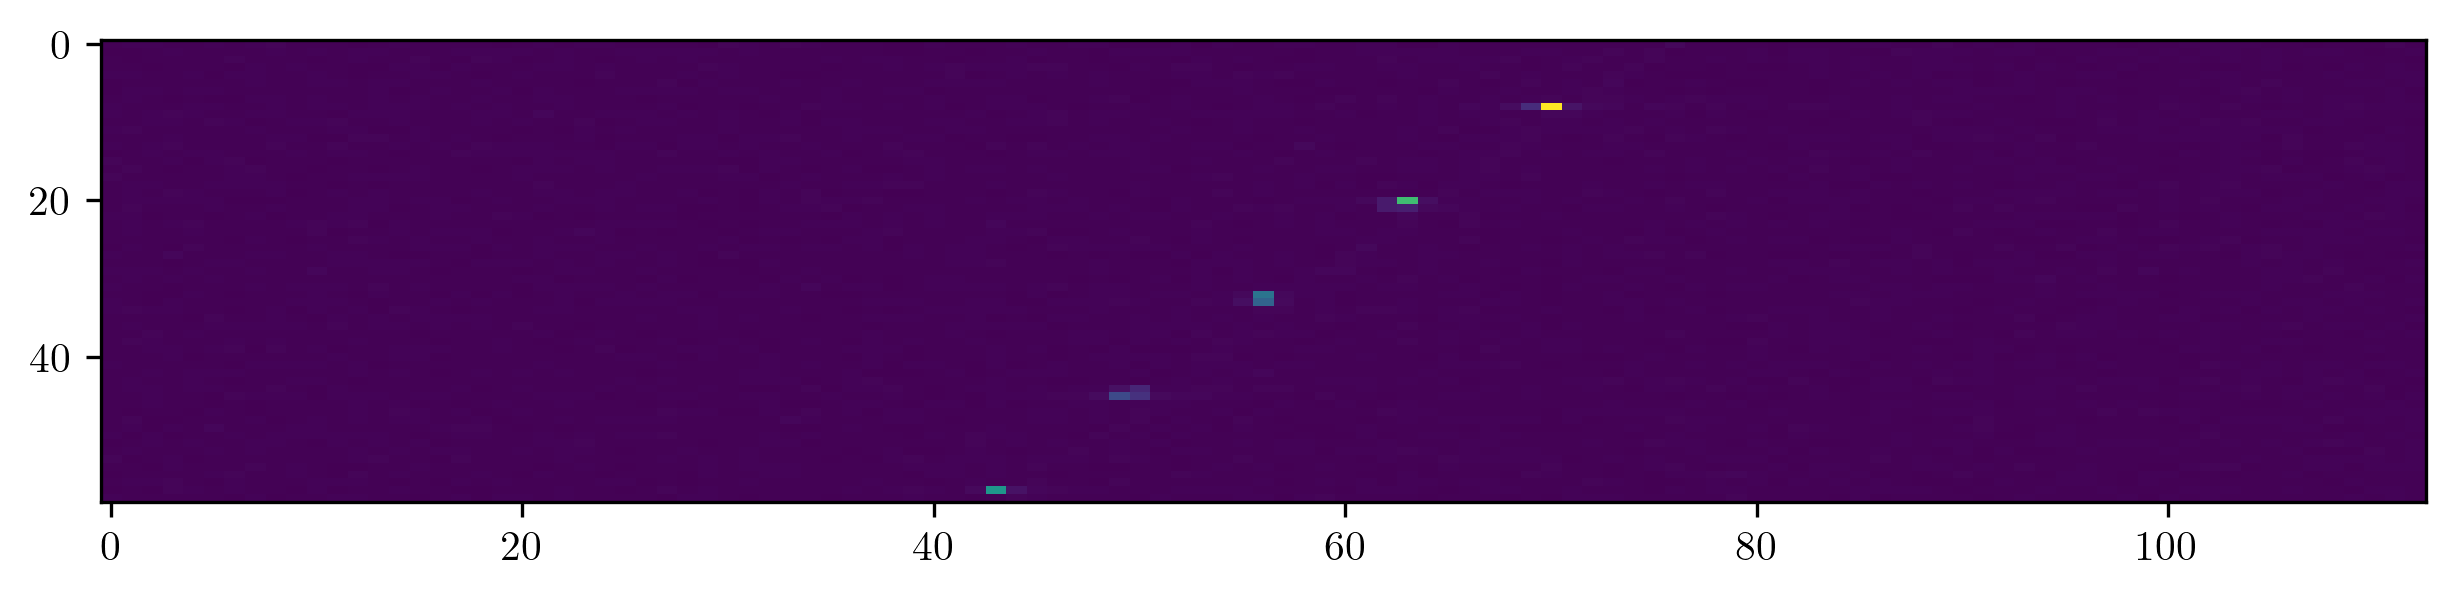

beam 0
hit with source JWST, beam 0, 2269.66334 MHz, 9.5 SNR, -0.184 Hz/s drift:


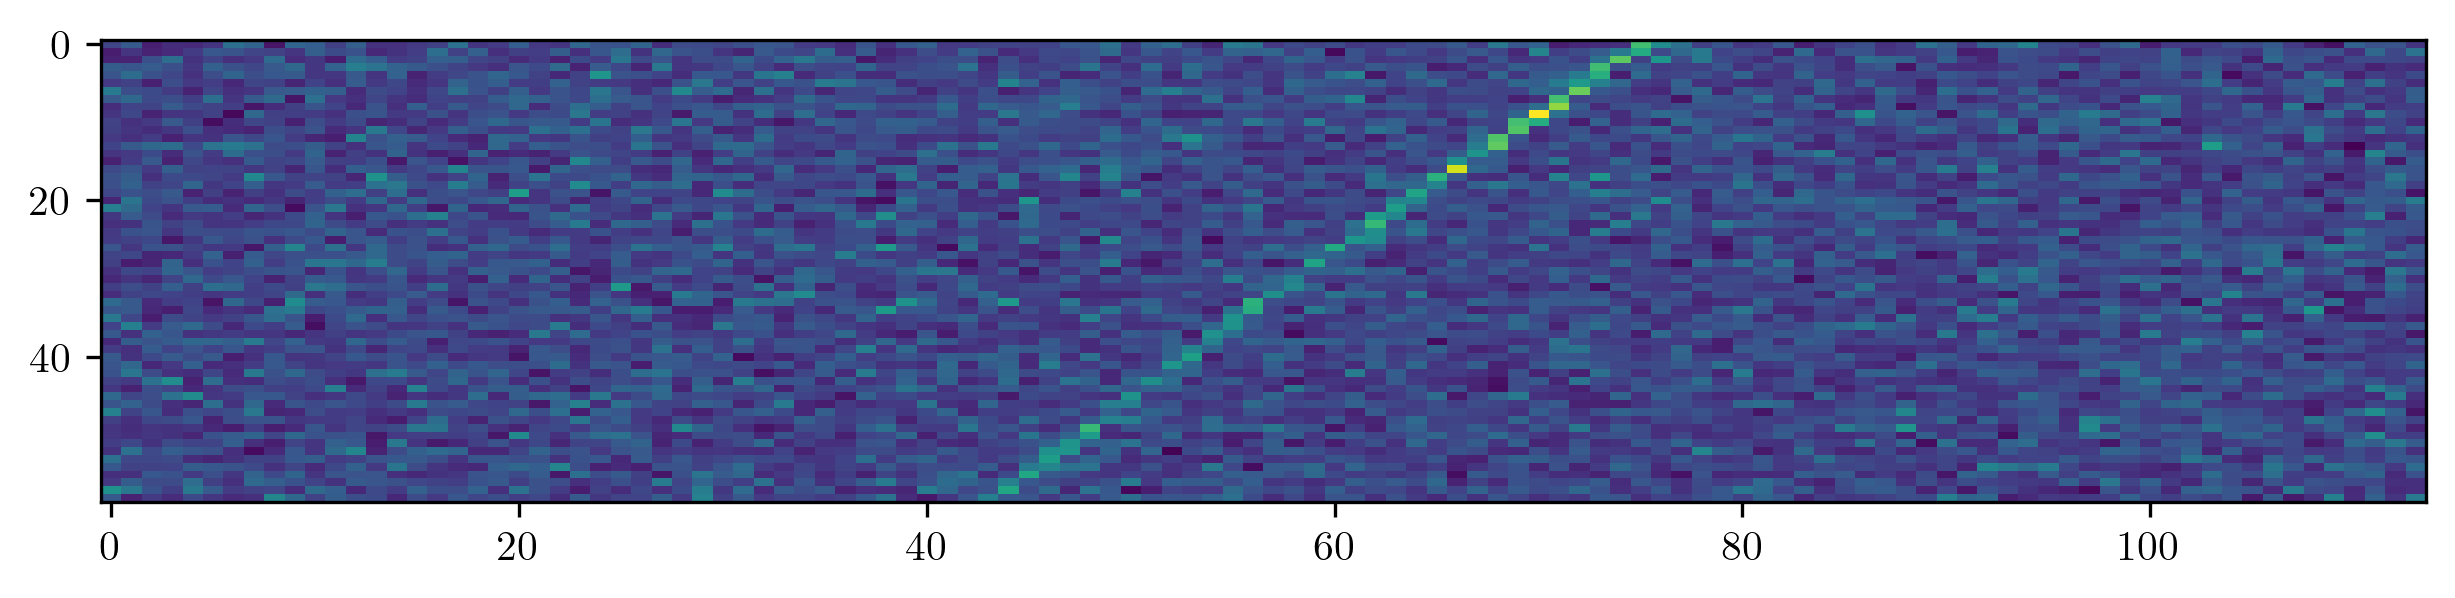

beam 0
hit with source JWST, beam 0, 2269.67934 MHz, 7.4 SNR, -0.184 Hz/s drift:


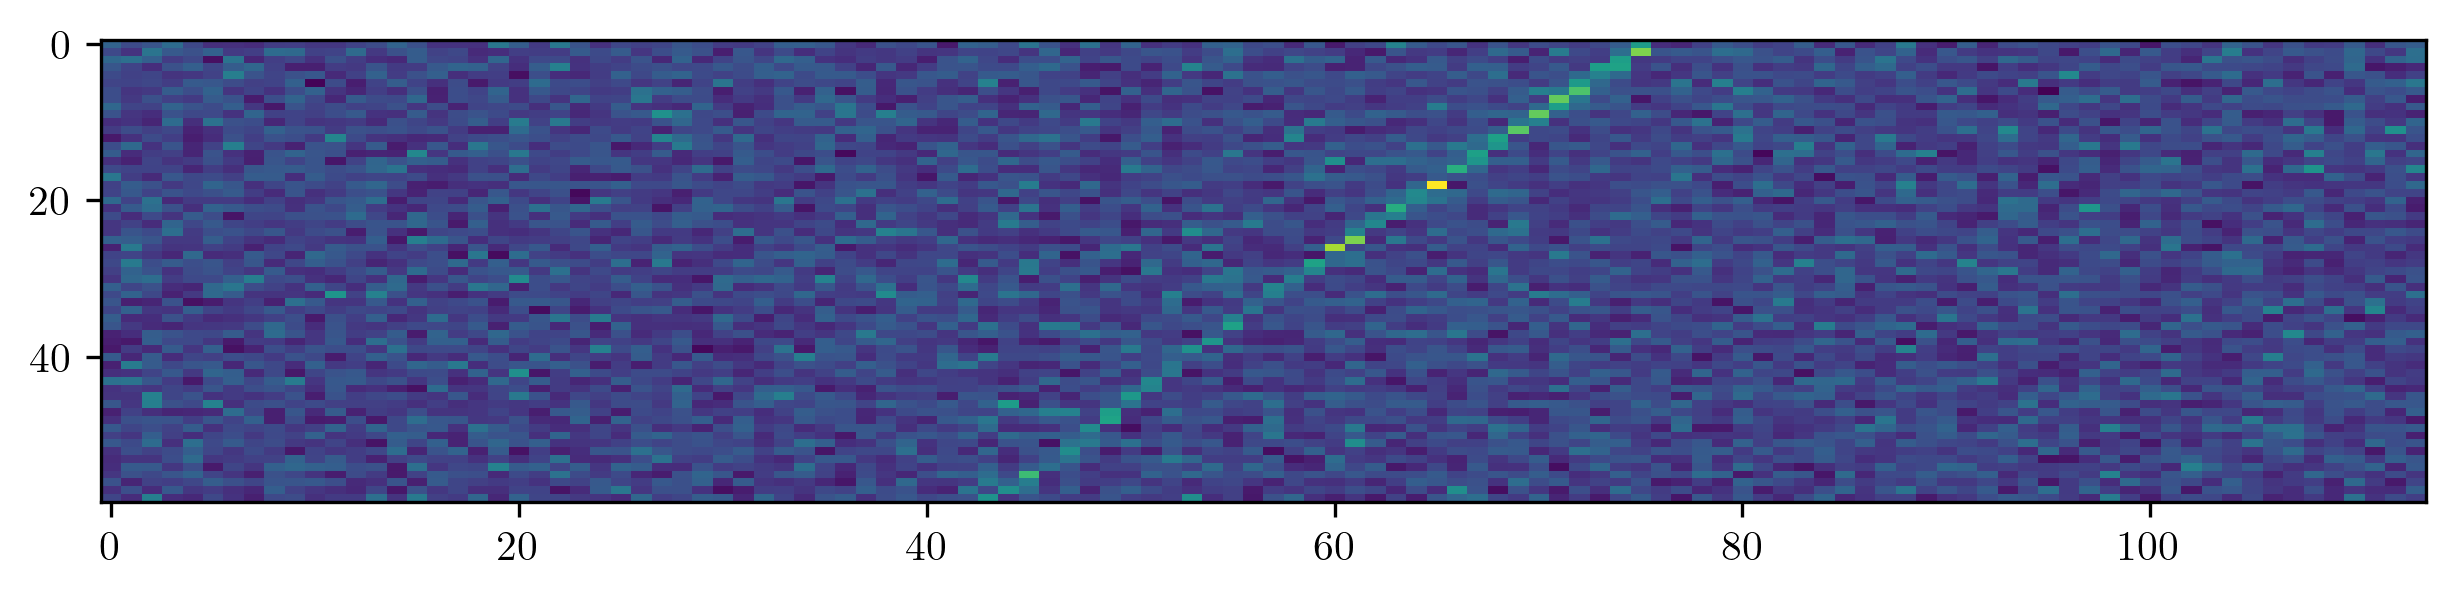

beam 0
hit with source JWST, beam 0, 2269.68736 MHz, 12.1 SNR, -0.184 Hz/s drift:


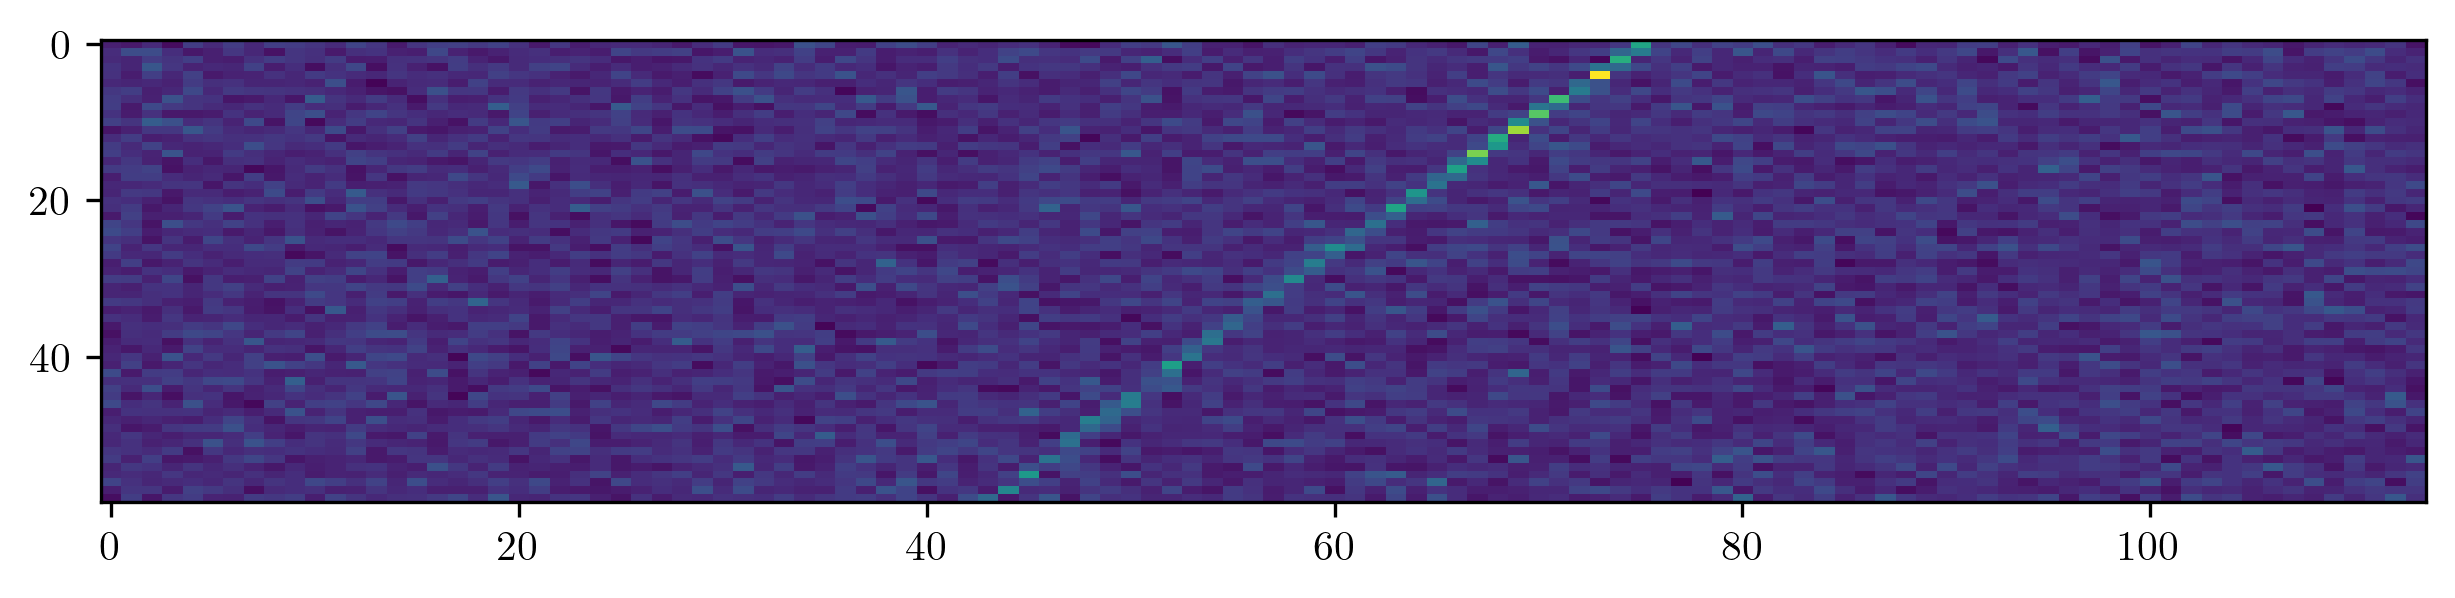

beam 0
hit with source JWST, beam 0, 2269.69534 MHz, 8.4 SNR, -0.184 Hz/s drift:


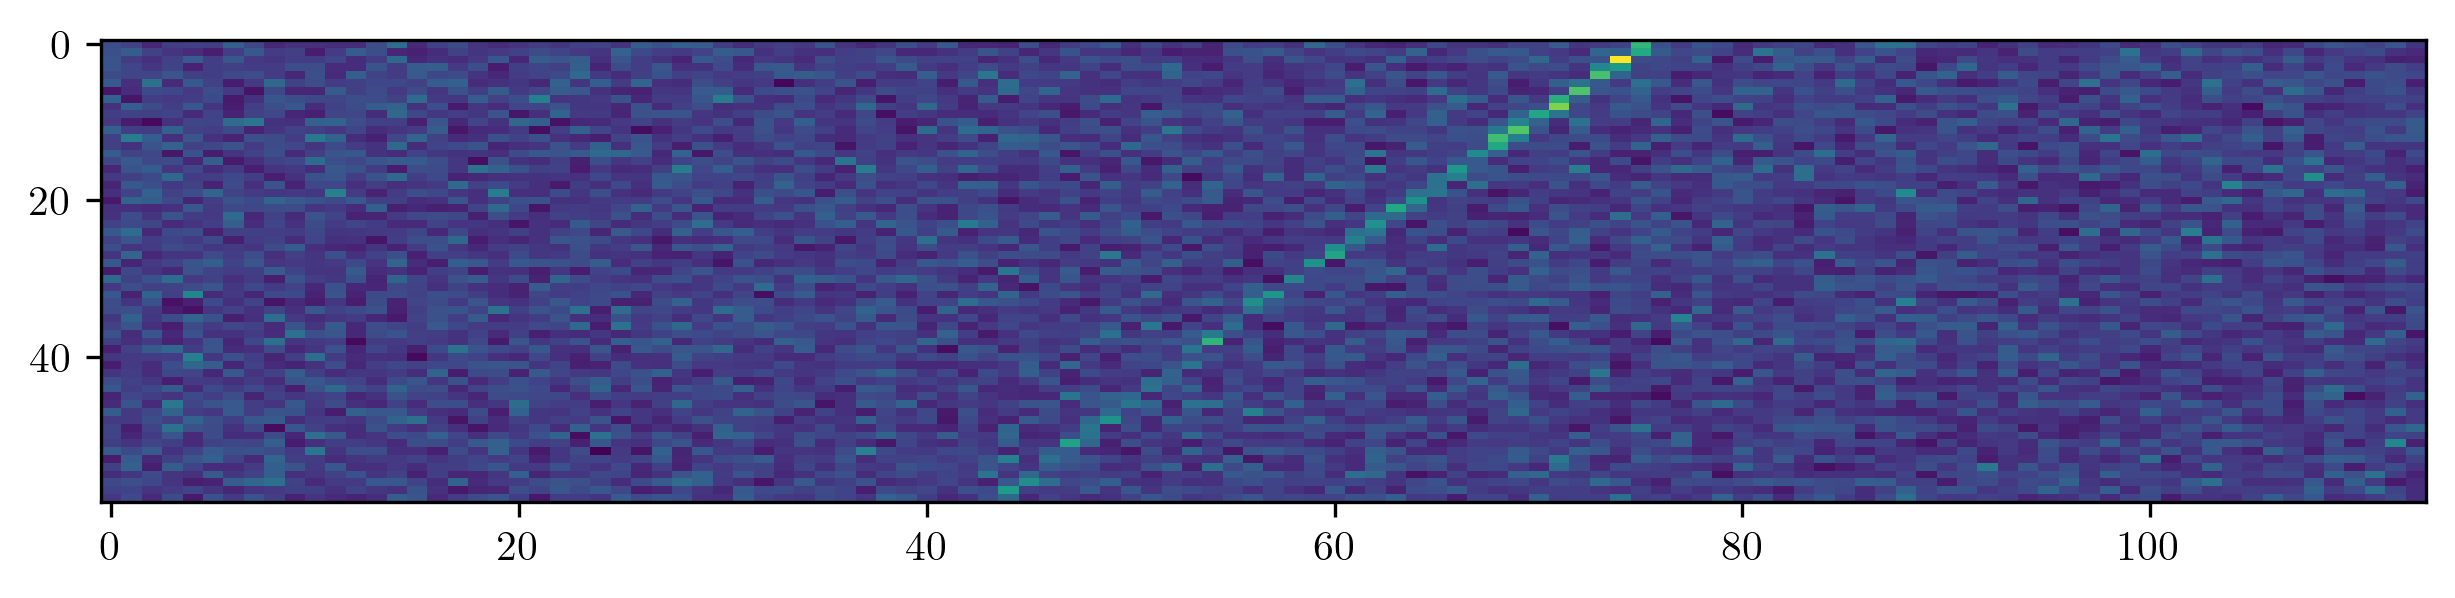

beam 0
hit with source JWST, beam 0, 2269.71134 MHz, 9.2 SNR, -0.184 Hz/s drift:


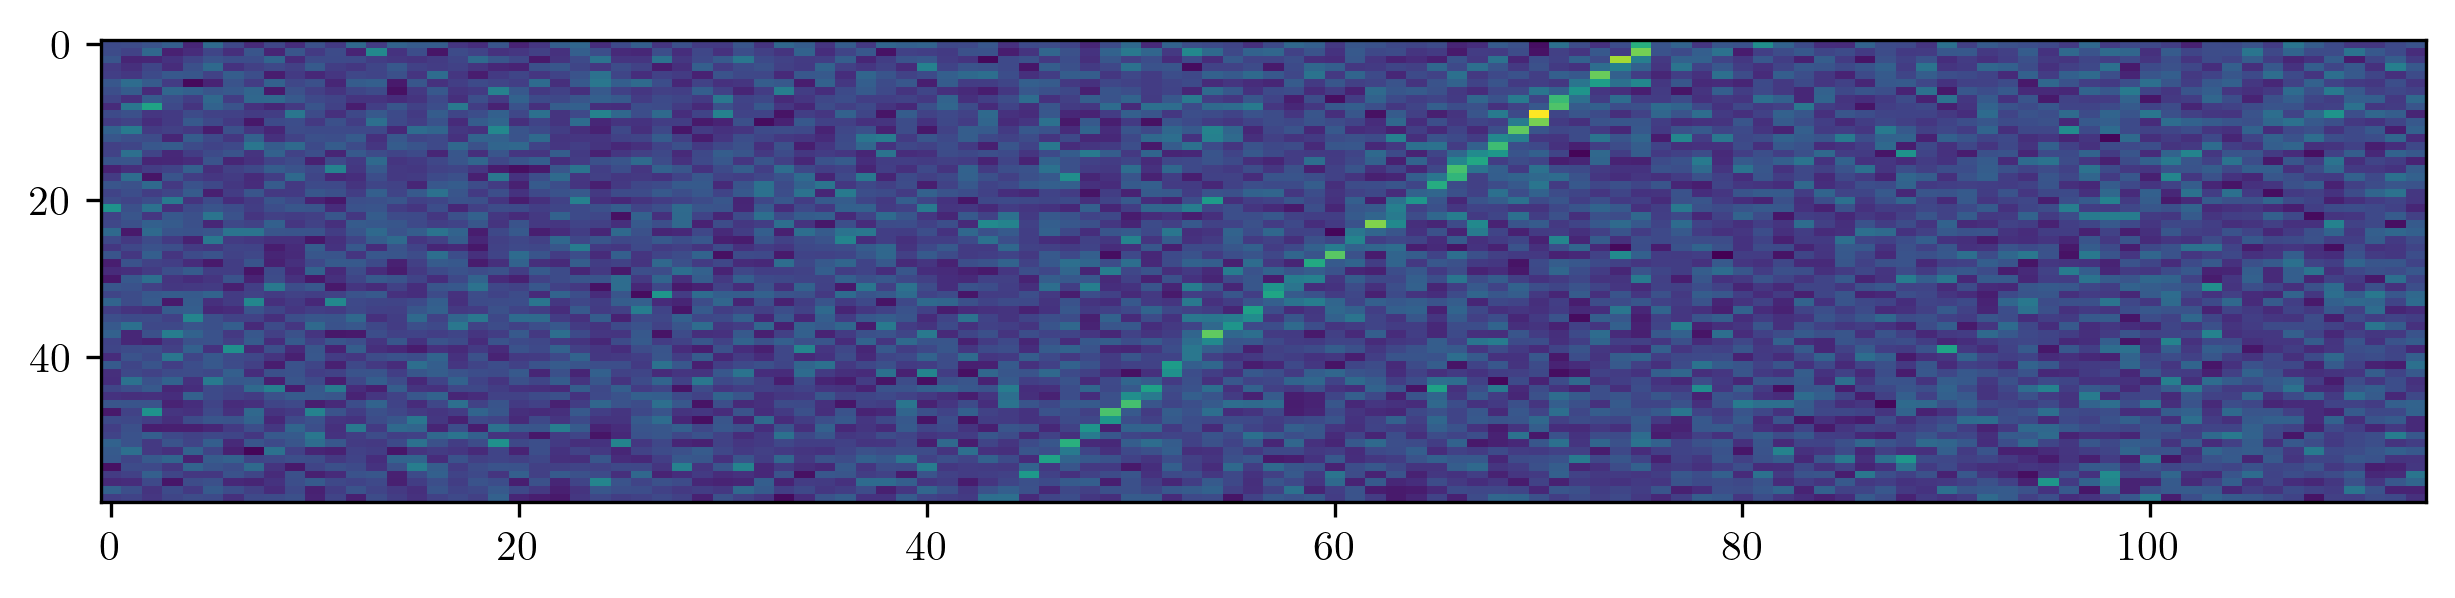

beam 0
hit with source JWST, beam 0, 2269.72734 MHz, 9.2 SNR, -0.179 Hz/s drift:


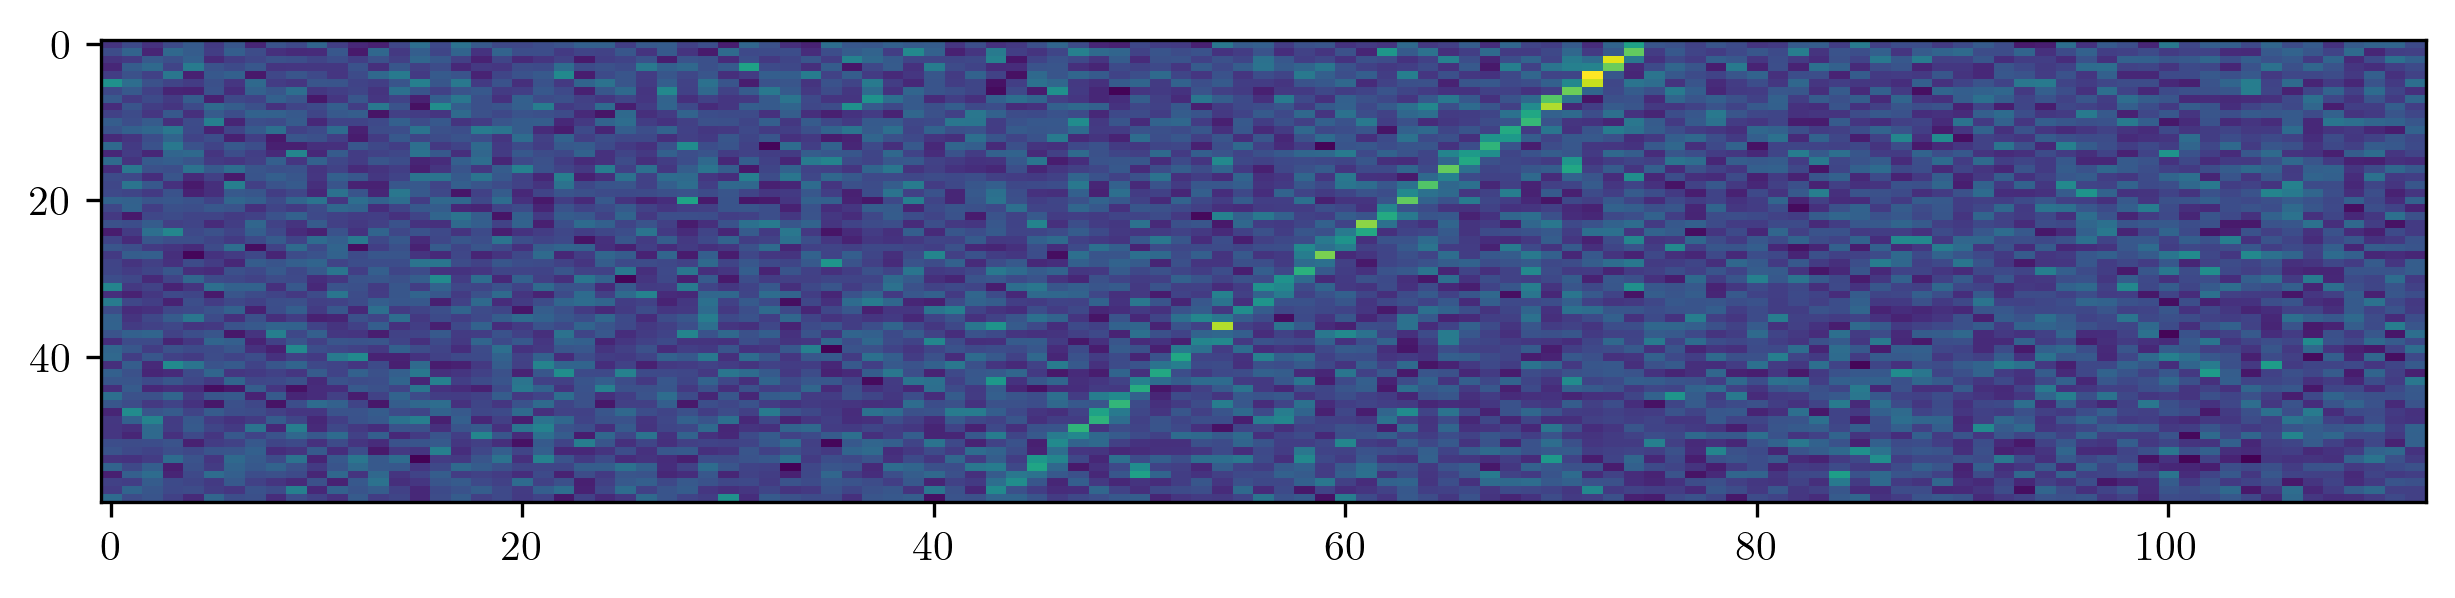

beam 0
hit with source JWST, beam 0, 2269.74334 MHz, 10.5 SNR, -0.184 Hz/s drift:


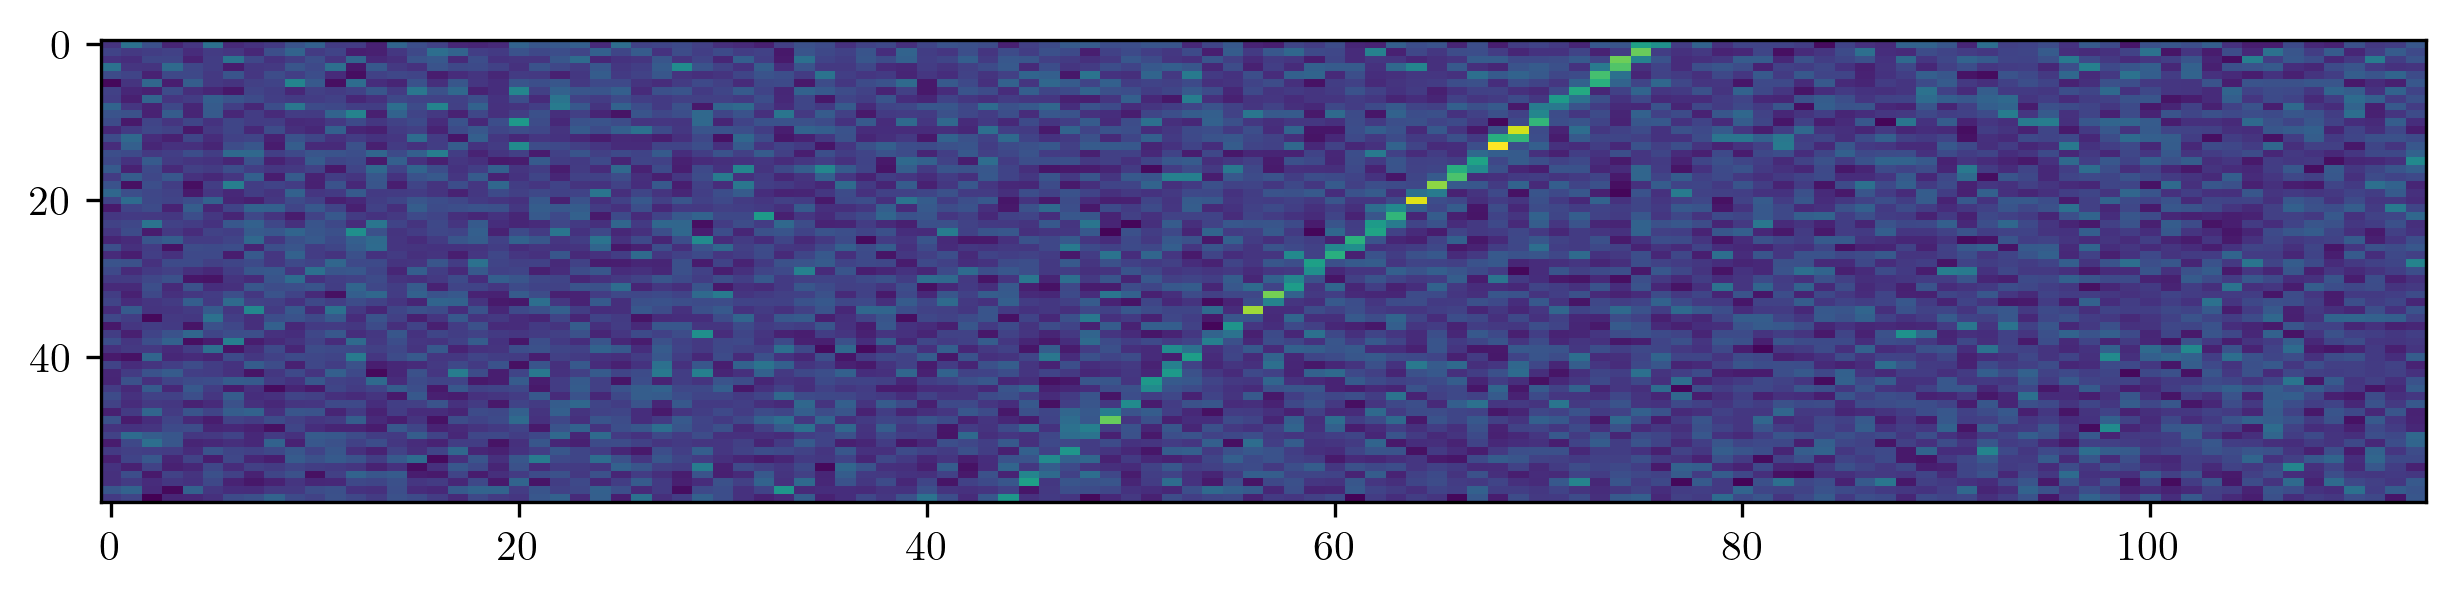

beam 0
hit with source JWST, beam 0, 2269.75934 MHz, 9.2 SNR, -0.184 Hz/s drift:


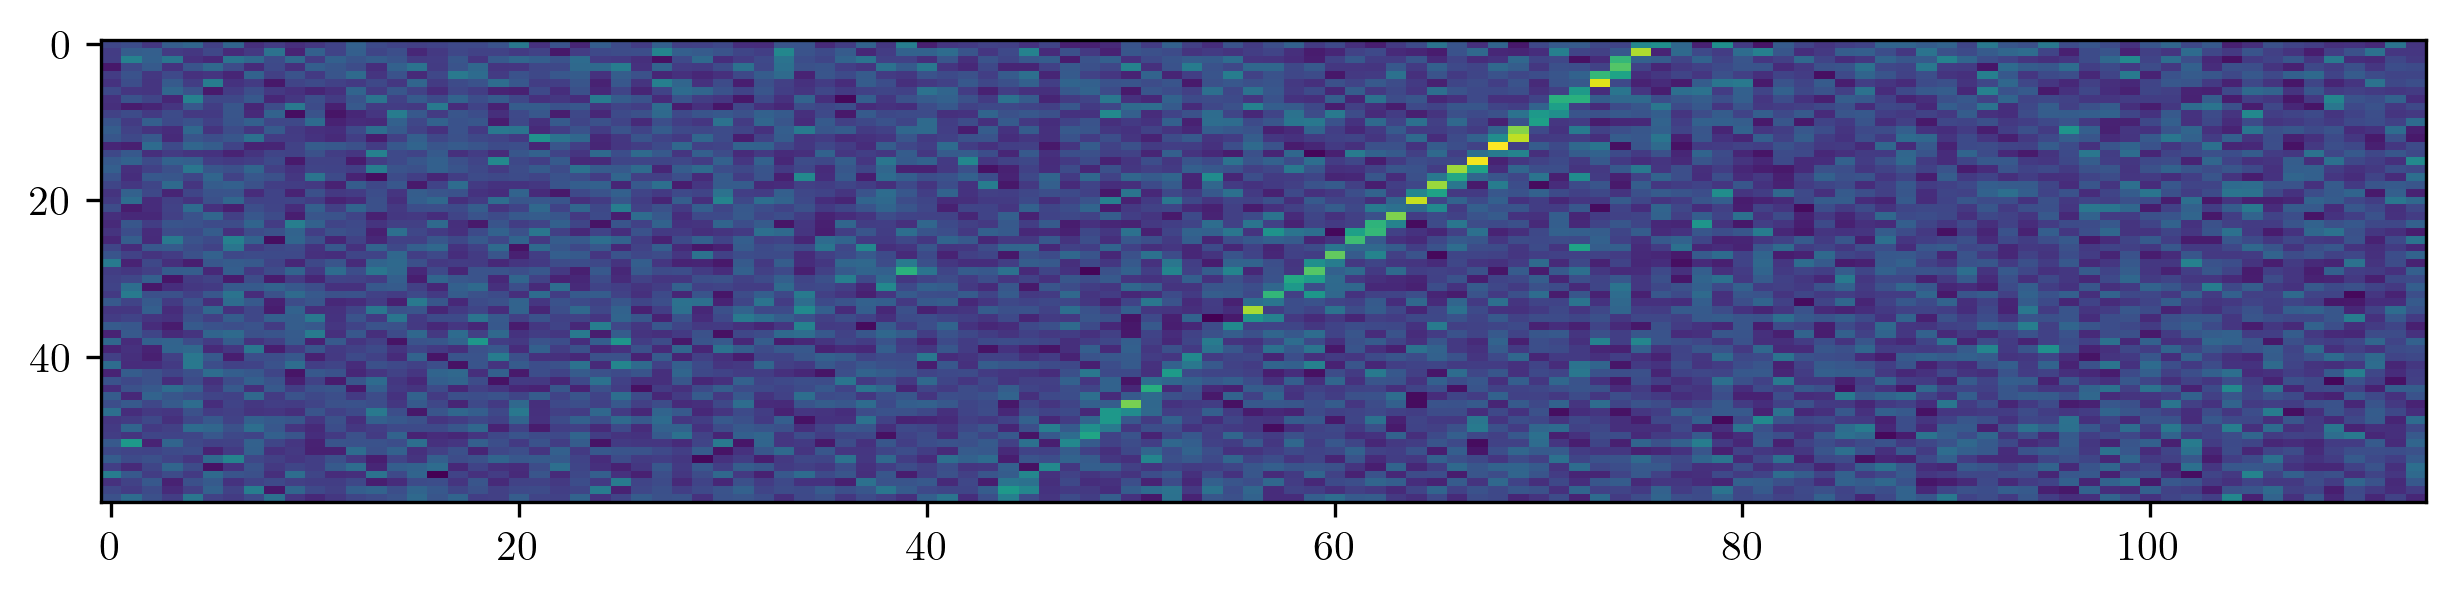

beam 0
hit with source JWST, beam 0, 2269.76932 MHz, 10.6 SNR, -0.184 Hz/s drift:


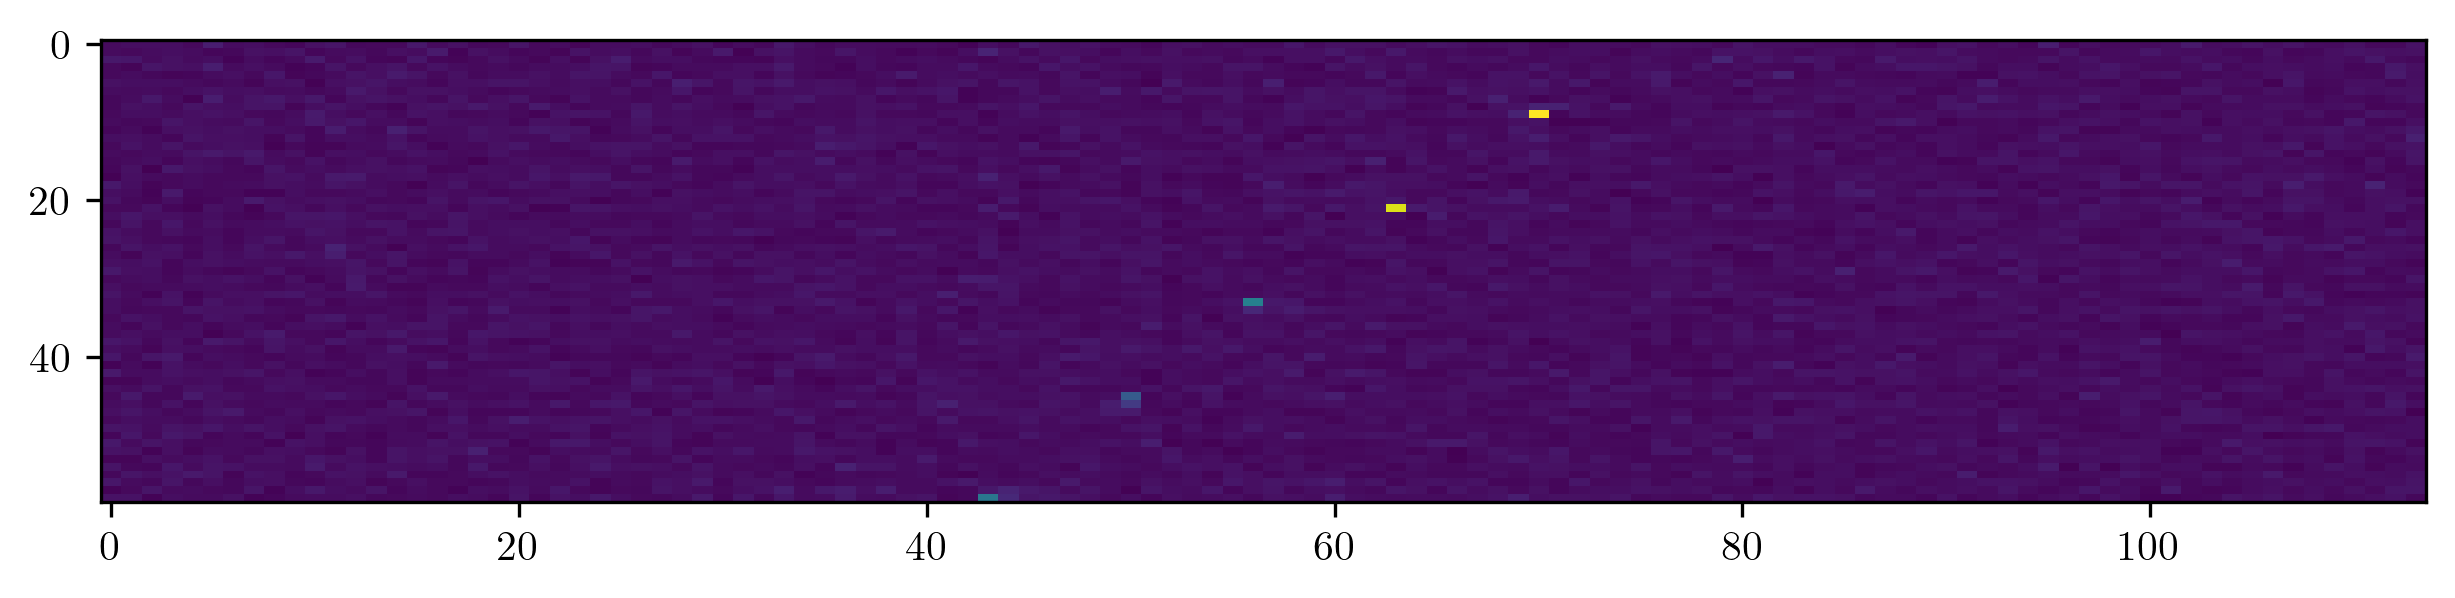

In [5]:
# hits and stamps:
hits = viewer.read_hits('guppi_60450_05861_003791_JWST_0001.hits')

for i, h in enumerate(hits):
    print(viewer.beam_name(h))
    viewer.show_hit(h)
    if i==20:
        break

In [6]:
# stamps = viewer.read_stamps('guppi_60450_05861_003791_JWST_0001.stamps')
# for s in stamps:
#     x = s.show_antennas()

In [7]:
stamps = viewer.read_stamps('guppi_60450_05861_003791_JWST_0001.stamps')
stamp = next(stamps)

In [8]:
# for f in stamp.frequencies():
#     print(f)
R = viewer.Recipe('MeerKAT-array_1-20240520T013741Z-original.bfr5')
times = stamp.times()

print(R.nbeams, R.nants, R.nchan, R.npol)

# R.time_array_index(times)
# stamp.real_array()
# stamp.show_classic_incoherent()

64 62 4096 2


0.00978952520802741


<Figure size 640x480 with 0 Axes>

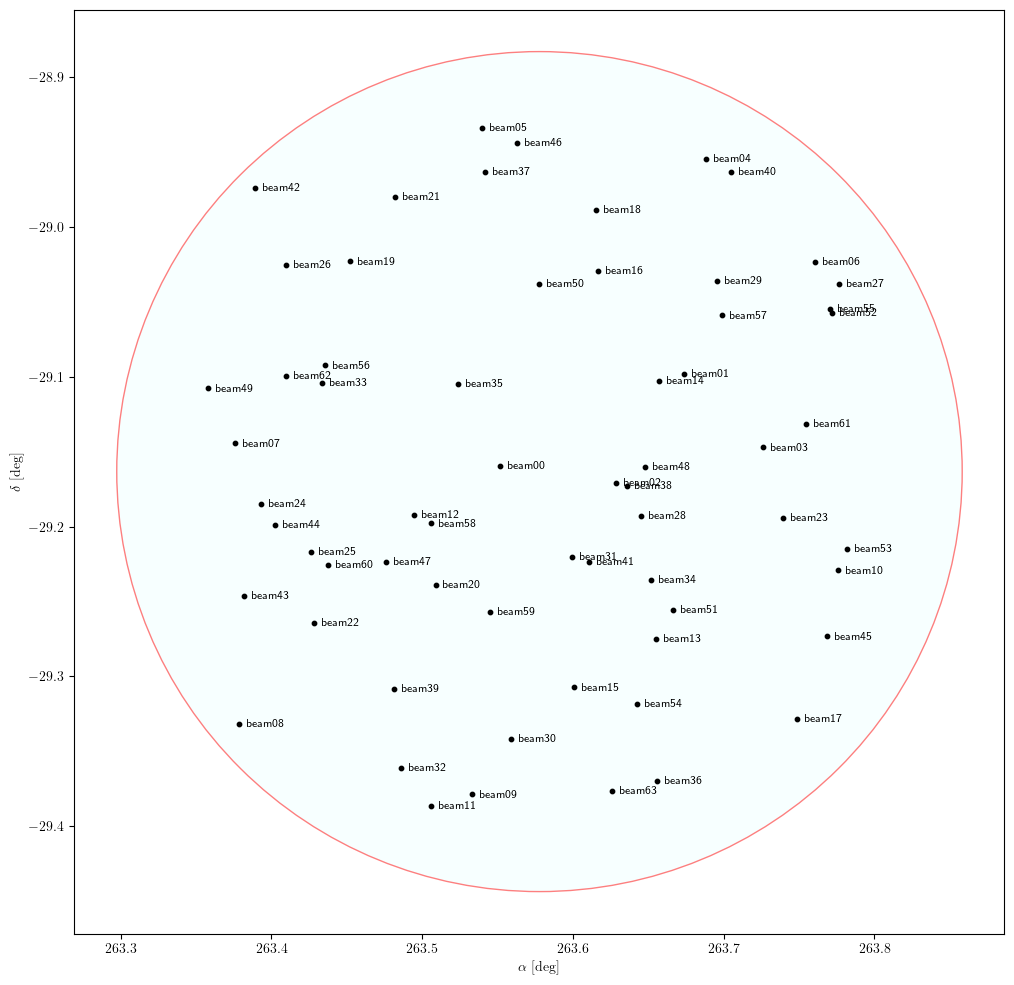

In [9]:
# Plotting beams in FOV
fov = 3e8/(2270e6*13.5) # radians
print(fov)

fov_deg = np.degrees(fov)
fov_asec = np.degrees(fov)*3600 # arcseconds

ras, decs = np.degrees(R.ras), np.degrees(R.decs)
circ = plt.Circle((np.mean(ras), np.mean(decs)), radius = fov_deg/2, ec='red', fc = 'azure', alpha=0.5)
fov_deg = np.degrees(fov)
plt.suptitle('Beam positions')
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel(r'$\mathrm{\alpha \ [deg]}$')
ax.set_ylabel(r'$\mathrm{\delta \ [deg]}$')
ax.add_patch(circ)
ax.scatter(np.degrees(R.ras), np.degrees(R.decs), s=10, c='black')
for i, xy in enumerate(zip(ras,decs)):
    ax.annotate(text=f'beam{i:02}', xy=xy, xytext = (5, 0), textcoords='offset points', size=8, ha='left', va='center')
plt.show()


In [10]:
# R.time_array # delays due to sky rotation

In [11]:
# R.src_names # gaia source names of stars where beams were located

In [12]:
freq_of_hits = np.array([])
hits_snr = np.array([])
drift_rate = np.array([])
beam_names = np.array([])
# Number of hits as a function of frequency (histogram): 
hits = viewer.read_hits('guppi_60450_05861_003791_JWST_0001.hits')
for hit in hits:
#     freq_of_hits.append(hit.signal.frequency)
#     hits_snr.append(hit.signal.snr)
    freq_of_hits = np.append(freq_of_hits, hit.signal.frequency)
    hits_snr = np.append(hits_snr, hit.signal.snr)
    drift_rate = np.append(drift_rate, hit.signal.driftRate)
    beam_names = np.append(beam_names, viewer.beam_name(hit))


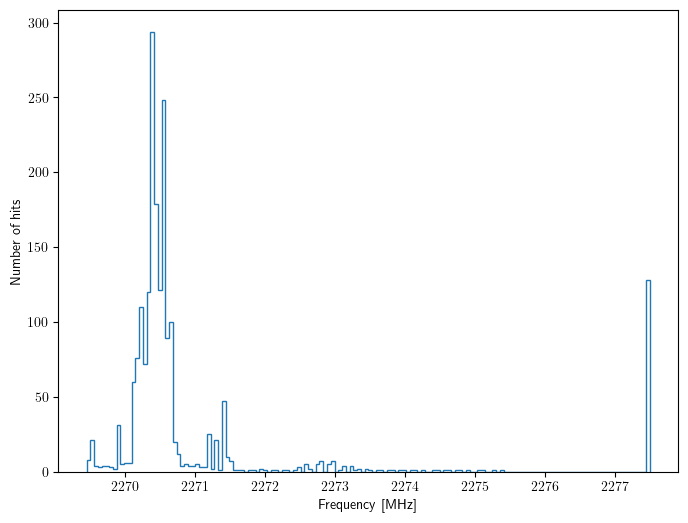

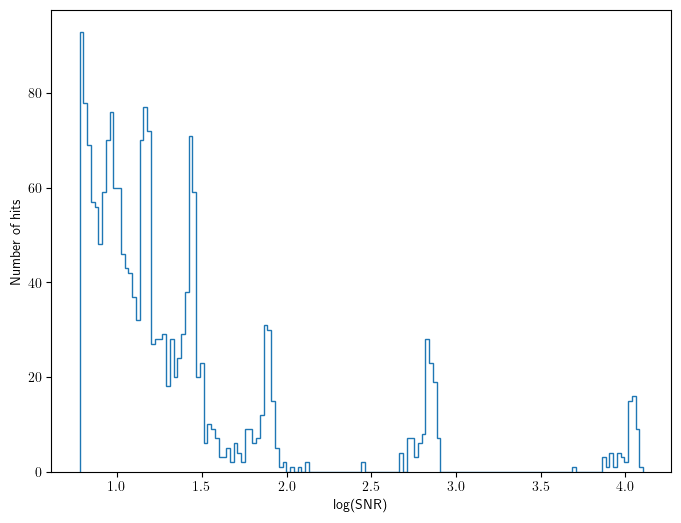

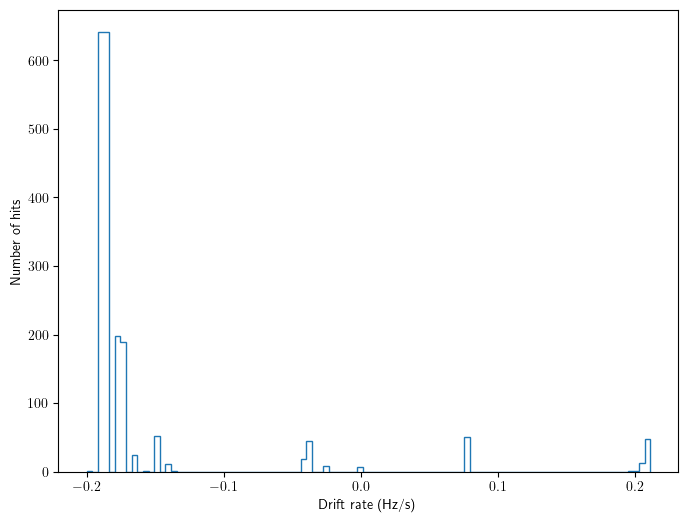

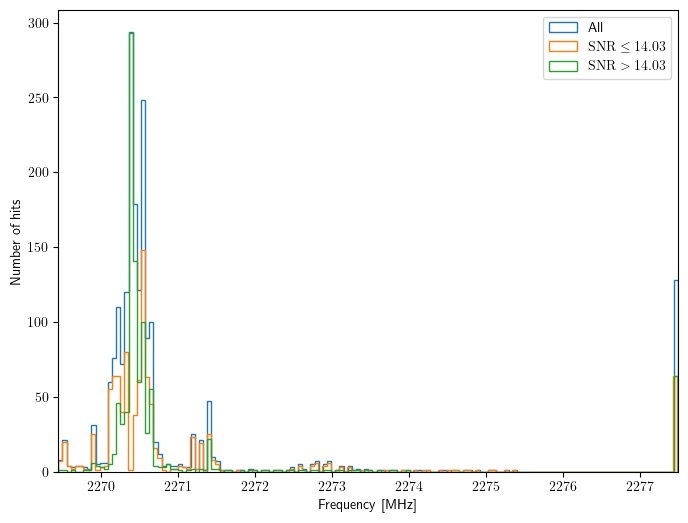

In [13]:
# plots hits by frequency, SNR, and drift rate
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(freq_of_hits, bins = 150, histtype = 'step')
ax.set_ylabel('Number of hits')
ax.set_xlabel('Frequency [MHz]')
plt.show()

fig, ax = plt.subplots(figsize = (8,6))
ax.hist(np.log10(hits_snr), bins = 150, histtype = 'step')
ax.set_ylabel('Number of hits')
ax.set_xlabel('log(SNR)')
plt.show()

fig, ax = plt.subplots(figsize = (8,6))
ax.hist(drift_rate, bins = 100, histtype = 'step')
ax.set_ylabel('Number of hits')
ax.set_xlabel('Drift rate (Hz/s)')
plt.show()


# Separate hits by SNR
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(freq_of_hits, bins = 150, histtype = 'step', label='All')
# ax.hist(freq_of_hits[hits_snr<10], bins=150, histtype = 'step', label=r'$\mathrm{SNR<10}$')

# ax.hist(freq_of_hits[(hits_snr>=10)&(hits_snr<=20)], bins=150, histtype = 'step', label=r'$\mathrm{SNR \geq 10}$')
# ax.hist(freq_of_hits[hits_snr>20], bins=150, histtype = 'step', label=r'$\mathrm{SNR>20}$')

ax.hist(freq_of_hits[hits_snr<=np.median(hits_snr)], bins=150, histtype = 'step', 
        label=fr'$\mathrm{{SNR \leq {np.median(hits_snr):.2f} }}$')
ax.hist(freq_of_hits[hits_snr>np.median(hits_snr)], bins=150, histtype = 'step', 
        label=fr'$\mathrm{{SNR> {np.median(hits_snr):.2f} }}$')

# ax.hist(freq_of_hits[hits_snr<=np.percentile(hits_snr, 90)], bins=150, histtype = 'step', 
#         label=fr'$\mathrm{{SNR \leq {np.percentile(hits_snr, 90):.2f} }}$')
# ax.hist(freq_of_hits[hits_snr>np.percentile(hits_snr, 90)], bins=150, histtype = 'step', 
#         label=fr'$\mathrm{{SNR> {np.percentile(hits_snr, 90):.2f} }}$')

ax.set_ylabel('Number of hits')
ax.set_xlabel('Frequency [MHz]')
ax.set_xlim(freq_of_hits.min(),freq_of_hits.max())
ax.legend()
plt.show()



In [14]:
# frequency on y axis, beam(name) on x axis. Each point represents a hit/number of hits. 
# We'll colorscale each point in graph relative number of points. Might be useful to use color bar

unique_beams = set(beam_names)
beam_freq_dict = {}
beam_snr_dict = {}
corresp_beam  = []
median_freqs = []
nhits_per_beam = []

for beam in unique_beams:
    beam_freq_dict[beam] = freq_of_hits[beam_names==beam]
    corresp_beam.append(beam[4:])
    median_freqs.append(np.median(freq_of_hits[beam_names==beam]))
    nhits_per_beam.append(freq_of_hits[beam_names==beam].size)
    
    beam_snr_dict[beam] = hits_snr[beam_names==beam]

In [15]:
beam_freq_dict


{'beam 56': array([2269.51410761, 2269.89691681, 2270.11133684, 2270.12733673,
        2270.14333662, 2270.15933651, 2270.17533639, 2270.19133628,
        2270.20733617, 2270.22333443, 2270.23933432, 2270.25533421,
        2270.2713341 , 2270.33533691, 2270.3513368 , 2270.36733669,
        2270.38333658, 2270.39933647, 2270.40733397, 2270.41533636,
        2270.43133625, 2270.44733614, 2270.46333603, 2270.47933592,
        2270.4953358 , 2270.51133406, 2270.52733395, 2270.54333384,
        2270.54958418, 2270.55933699, 2270.57533688, 2270.59133677,
        2270.60733666, 2270.62333655, 2270.63764795, 2270.65533632,
        2270.67133458, 2271.17296052, 2271.30056522, 2271.42816503,
        2277.48792456, 2277.49513648]),
 'beam 3': array([2269.45030363, 2269.51410924, 2269.89692007, 2270.11133684,
        2270.12733673, 2270.14333662, 2270.15933651, 2270.17533639,
        2270.19133628, 2270.20733617, 2270.22333606, 2270.23933595,
        2270.25533584, 2270.27133573, 2270.33533691, 22

In [16]:
# fig, ax = plt.subplots(figsize = (20,4))
# ax.scatter(np.int32(corresp_beam), median_freqs, s=20, c = nhits_per_beam)
# # ax.set_xticklabels([f'beam {i}' for i in range(64)])
# ax.set_xticks([i for i in range(64)], labels = [f'beam {i}' for i in range(64)], rotation=45)
# plt.show()

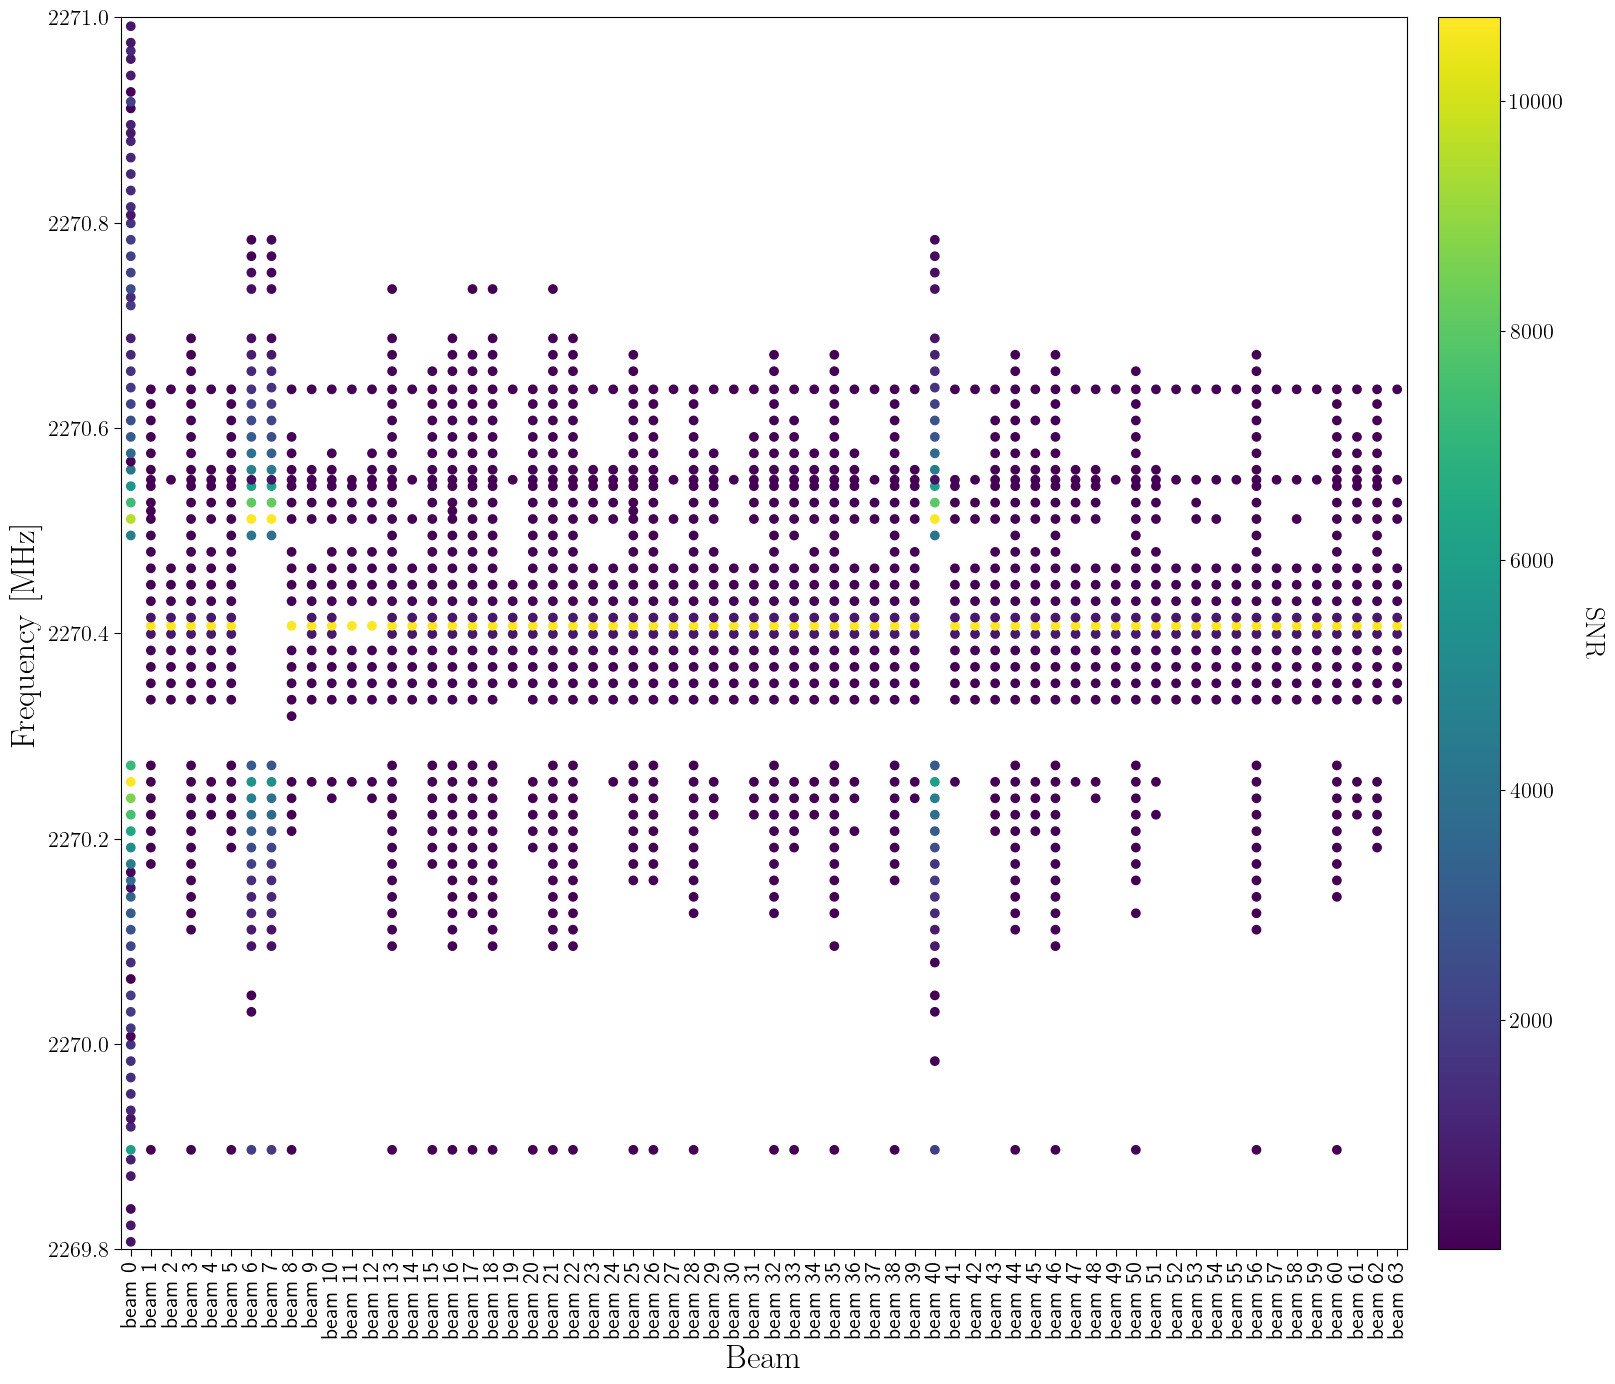

In [17]:
fig, ax = plt.subplots(figsize = (20,16))
for beam in beam_freq_dict:
    freqs = beam_freq_dict[beam]
    snr = beam_snr_dict[beam]
    im = ax.scatter([int(beam[4:])]*freqs.size, freqs, c=(snr), cmap = 'viridis')
# ax.set_xticklabels([f'beam {i}' for i in range(64)])
ax.set_xticks([i for i in range(64)], labels = [f'beam {i}' for i in range(64)], rotation=90)
ax.set_xlim(-0.5, 63.5)
ax.tick_params(labelsize=16, which='major', length = 5)
cbar = fig.colorbar(mappable = im, ax=ax, pad=0.02)
cbar.set_label(r'$\mathrm{SNR}$', rotation=270, size=20, loc = 'center', labelpad=30)
cbar.ax.tick_params(labelsize=16)
ax.set_xlabel(r'$\mathrm{Beam}$', size = 24)
ax.set_ylabel(r'$\mathrm{Frequency \ [MHz]}$', size= 24)

ax.set_ylim(2269.8, 2271)

# fig.tight_layout()
plt.show()

In [18]:
# beam_snr_sum = np.array([])
# beam_snr_sum_ind = np.array([], dtype='int64')
# for beam in beam_snr_dict:
#     snr = beam_snr_dict[beam]
#     beam_snr_sum = np.append(beam_sum, np.sum(snr))
#     beam_snr_sum_ind = np.append(beam_snr_sum_ind, np.int64(beam[4:])) 

# print(beam_snr_sum_ind)
# sorted_beam_snr_sum = beam_snr_sum[beam_snr_sum_ind]

# for x, y in zip(beam_snr_dict, beam_sum):
#     print(x, y)

# print('')
# beam_list = [f'beam {i}' for i in range(64)]
# for beam, x in zip(beam_list, sorted_beam_snr_sum):
#     print(f'{beam}', x)
# sorted_ras_ind = np.argsort(ras)
# sorted_decs_ind = np.argsort(decs)

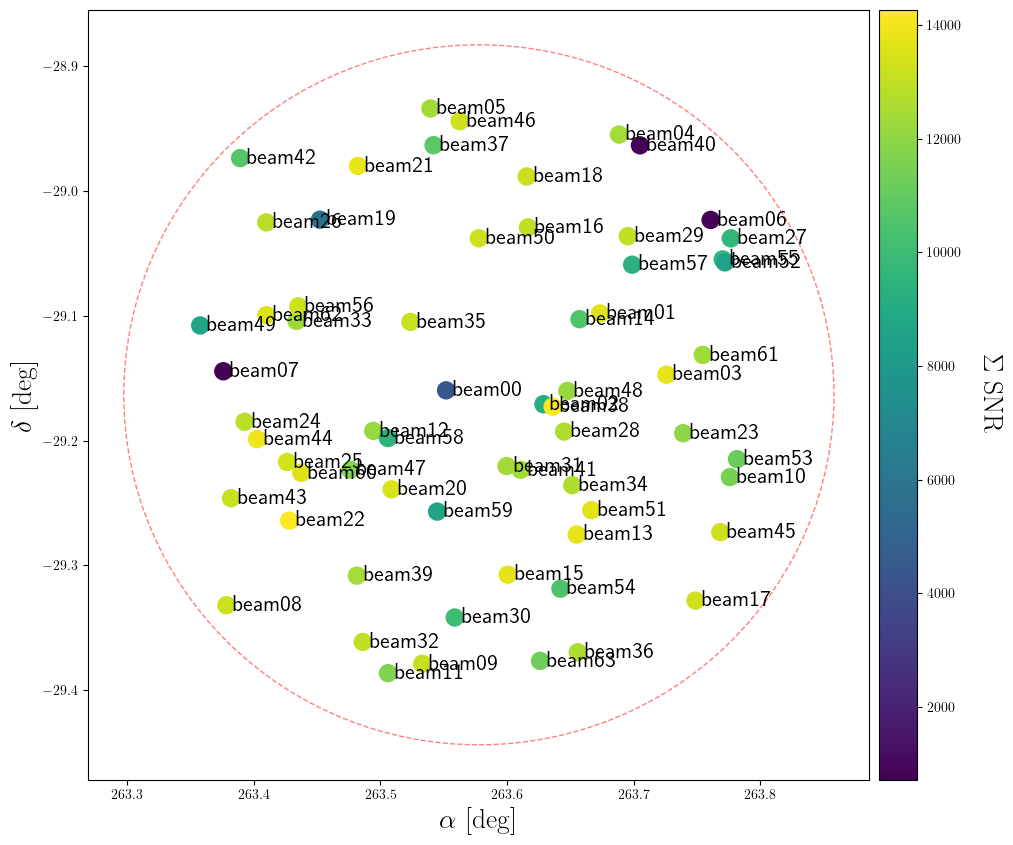

In [19]:
# Summing snr along frequency axis and sorting sums according to ra and dec

beam_snr_sum = np.array([]) # array for summing up all SNRs over frequency for each beam
beam_snr_sum_ind = np.array([], dtype='int64') # order of snr sums as they appear
for beam in beam_snr_dict:
    snr = beam_snr_dict[beam]
    beam_snr_sum = np.append(beam_snr_sum, np.sum( (snr ) ) ) # sum - max  
    beam_snr_sum_ind = np.append(beam_snr_sum_ind, np.int64(beam[4:])) 


# print(beam_snr_sum_ind)

# for x, y in zip(beam_snr_dict, beam_snr_sum):
#     print(x, y)

beam_list = np.array([f'beam {i}' for i in range(64)])
beam_snr_sum = beam_snr_sum[np.argsort(beam_snr_sum_ind)] #sorting snr sums

# organise snr and dec relative to ra
sorted_ra_ind = np.argsort(ras)
# sorted_dec_ind = np.argsort(decs)

ra_sorted_snr_sum = beam_snr_sum[sorted_ra_ind]
sorted_ra, sorted_dec = ras[sorted_ra_ind], decs[sorted_ra_ind]

circ = plt.Circle((np.mean(ras), np.mean(decs)), radius = fov_deg/2, ec='red', fc = 'white', alpha=0.5, linestyle = '--')
fig, ax = plt.subplots(figsize=(12,10))
ax.add_patch(circ)
im = ax.scatter(sorted_ra, sorted_dec, s=150, c = (ra_sorted_snr_sum))
for i, xy in enumerate(zip(ras,decs)):
    ax.annotate(text=f'beam{i:02}', xy=xy, xytext = (5, 0), textcoords='offset points', size=16, ha='left', va='center')
cbar = fig.colorbar(im, ax=ax, pad=0.01)
cbar.set_label(r'$\mathrm{\Sigma \ SNR}$', rotation=270, size=20, loc = 'center', labelpad=30)
ax.set_xlabel(r'$\mathrm{\alpha \ [deg]}$', size=20)
ax.set_ylabel(r'$\mathrm{\delta \ [deg]}$', size=20)

plt.show()
# dec_sorted_sum = beam_snr_sum[sorted_dec_ind]
# X, Y = np.meshgrid(ra_sorted_sum, dec_sorted_sum)
# S_sq = (X * Y) # signal squared

# np.sqrt(np.diag(S_sq))
# fig, ax = plt.subplots(figsize = (6.4, 6.4))
# ax.imshow((S_sq), aspect = 'auto')
